# Project 1

### 2.1: Loading the data and Data Description

In [1]:
library("tidyverse")

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang
Registered S3 method overwritten by 'rvest':
  method            from
  read_xml.response xml2
-- Attaching packages --------------------------------------- tidyverse 1.2.1 --
v ggplot2 3.1.1       v purrr   0.3.2  
v tibble  2.1.1       v dplyr   0.8.0.1
v tidyr   0.8.3       v stringr 1.4.0  
v readr   1.3.1       v forcats 0.4.0  
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()


In [2]:
cases <- read_csv("COVID-19_cases_plus_census.csv")

Parsed with column specification:
cols(
  .default = col_double(),
  county_fips_code = col_character(),
  county_name = col_character(),
  state = col_character(),
  state_fips_code = col_character(),
  date = col_date(format = ""),
  geo_id = col_character(),
  pop_5_years_over = col_logical(),
  speak_only_english_at_home = col_logical(),
  speak_spanish_at_home = col_logical(),
  speak_spanish_at_home_low_english = col_logical(),
  pop_15_and_over = col_logical(),
  pop_never_married = col_logical(),
  pop_now_married = col_logical(),
  pop_separated = col_logical(),
  pop_widowed = col_logical(),
  pop_divorced = col_logical()
)
See spec(...) for full column specifications.


In [3]:
cases

county_fips_code,county_name,state,state_fips_code,date,confirmed_cases,deaths,geo_id,nonfamily_households,family_households,...,speak_only_english_at_home,speak_spanish_at_home,speak_spanish_at_home_low_english,pop_15_and_over,pop_never_married,pop_now_married,pop_separated,pop_widowed,pop_divorced,do_date
50009,Essex County,VT,50,2021-01-19,111,0,50009,994,1726,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,20132017
50007,Chittenden County,VT,50,2021-01-19,3636,78,50007,27549,37357,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,20132017
10001,Kent County,DE,10,2021-01-19,11548,187,10001,19148,44233,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,20132017
44009,Washington County,RI,44,2021-01-19,5521,122,44009,16912,32696,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,20132017
33001,Belknap County,NH,33,2021-01-19,2496,79,33001,8260,16319,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,20132017
44005,Newport County,RI,44,2021-01-19,3578,6,44005,13438,21983,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,20132017
50015,Lamoille County,VT,50,2021-01-19,312,1,50015,4086,6315,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,20132017
09013,Tolland County,CT,09,2021-01-19,6255,125,09013,19146,35732,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,20132017
50001,Addison County,VT,50,2021-01-19,527,5,50001,5283,9418,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,20132017
50005,Caledonia County,VT,50,2021-01-19,307,4,50005,4763,7331,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,20132017


In [4]:
cases <- cases %>% mutate_if(is.character, factor)
dim(cases)

[1] 3142  259

Using str() to get a summary of the data

In [62]:
str(cases)

Classes 'tbl_df', 'tbl' and 'data.frame':	0 obs. of  259 variables:
 $ county_fips_code                                              : Factor w/ 3142 levels "01001","01003",..: 
 $ county_name                                                   : Factor w/ 1878 levels "Abbeville County",..: 
 $ state                                                         : Factor w/ 51 levels "AK","AL","AR",..: 
 $ state_fips_code                                               : Factor w/ 51 levels "01","02","04",..: 
 $ date                                                          : 'Date' num(0) 
 $ confirmed_cases                                               : num 
 $ deaths                                                        : num 
 $ geo_id                                                        : Factor w/ 3142 levels "01001","01003",..: 
 $ nonfamily_households                                          : num 
 $ family_households                                             : num 
 $ median_year_

Because the dataset is so large and has so many features, we decided to trim it to only the features that we would like to explore:

In [6]:
cases_small <- cases[, c("state", "confirmed_cases", "deaths", "total_pop","male_pop", "female_pop", "white_pop", "black_pop",
                    "asian_pop","hispanic_pop","amerindian_pop", "median_age")]
str(cases_small)

Classes 'tbl_df', 'tbl' and 'data.frame':	3142 obs. of  12 variables:
 $ state          : Factor w/ 51 levels "AK","AL","AR",..: 47 47 9 40 31 40 47 7 47 47 ...
 $ confirmed_cases: num  111 3636 11548 5521 2496 ...
 $ deaths         : num  0 78 187 122 79 6 1 125 5 4 ...
 $ total_pop      : num  6203 160985 173145 126190 60383 ...
 $ male_pop       : num  3135 78928 83544 61154 29705 ...
 $ female_pop     : num  3068 82057 89601 65036 30678 ...
 $ white_pop      : num  5929 143657 108627 115206 57523 ...
 $ black_pop      : num  64 4091 41729 1621 285 ...
 $ asian_pop      : num  32 6144 3459 2436 579 ...
 $ hispanic_pop   : num  83 3542 11820 3769 951 ...
 $ amerindian_pop : num  20 374 967 1047 130 ...
 $ median_age     : num  50 36.6 37.3 44.1 46.7 44.6 40.5 37.9 43.4 43.7 ...


In [7]:
summary(cases_small)

     state      confirmed_cases         deaths          total_pop       
 TX     : 254   Min.   :      0.0   Min.   :    0.0   Min.   :      74  
 GA     : 159   1st Qu.:    796.2   1st Qu.:   12.0   1st Qu.:   10945  
 VA     : 133   Median :   1916.5   Median :   31.0   Median :   25692  
 KY     : 120   Mean   :   7558.9   Mean   :  124.8   Mean   :  102166  
 MO     : 115   3rd Qu.:   4955.0   3rd Qu.:   77.0   3rd Qu.:   67445  
 KS     : 105   Max.   :1002614.0   Max.   :13936.0   Max.   :10105722  
 (Other):2256                                                           
    male_pop         female_pop        white_pop         black_pop      
 Min.   :     39   Min.   :     35   Min.   :     18   Min.   :      0  
 1st Qu.:   5514   1st Qu.:   5460   1st Qu.:   8093   1st Qu.:     95  
 Median :  12798   Median :  12885   Median :  20205   Median :    758  
 Mean   :  50292   Mean   :  51873   Mean   :  62787   Mean   :  12554  
 3rd Qu.:  33481   3rd Qu.:  34108   3rd Qu.:  5350

### 2.2: Data Quality and Integrity

Here we will check the small dataset for any duplicated or missing values and adjust the dataset accordingly.

In [8]:
any(duplicated(cases_small))

[1] FALSE

In [9]:
any(is.na(cases_small))

[1] FALSE

Since we can see that there are no duplicated or missing values, the small dataset is ready to be worked with. Just for completeness sake, and if we decide later on to use more features, the full dataset will also be checked for duplicates and missing values

In [10]:
any(duplicated(cases))

[1] FALSE

In [11]:
any(is.na(cases))

[1] TRUE

From this we can see that there are no duplicated values in the dataset, but there are some missing values. These values will now be removed from the dataset.

In [12]:
cases <- na.omit(cases)
any(is.na(cases))

[1] FALSE

In [13]:
summary(cases_small)

     state      confirmed_cases         deaths          total_pop       
 TX     : 254   Min.   :      0.0   Min.   :    0.0   Min.   :      74  
 GA     : 159   1st Qu.:    796.2   1st Qu.:   12.0   1st Qu.:   10945  
 VA     : 133   Median :   1916.5   Median :   31.0   Median :   25692  
 KY     : 120   Mean   :   7558.9   Mean   :  124.8   Mean   :  102166  
 MO     : 115   3rd Qu.:   4955.0   3rd Qu.:   77.0   3rd Qu.:   67445  
 KS     : 105   Max.   :1002614.0   Max.   :13936.0   Max.   :10105722  
 (Other):2256                                                           
    male_pop         female_pop        white_pop         black_pop      
 Min.   :     39   Min.   :     35   Min.   :     18   Min.   :      0  
 1st Qu.:   5514   1st Qu.:   5460   1st Qu.:   8093   1st Qu.:     95  
 Median :  12798   Median :  12885   Median :  20205   Median :    758  
 Mean   :  50292   Mean   :  51873   Mean   :  62787   Mean   :  12554  
 3rd Qu.:  33481   3rd Qu.:  34108   3rd Qu.:  5350

### 2.3: Data Visualization

We will now split the dataset into the states the we want to analyze: California and Florida.

In [14]:
cases_FL <- cases_small %>% filter(state == "FL")
cases_CA <- cases_small %>% filter(state == "CA")

In [15]:
summary(cases_FL)

     state    confirmed_cases      deaths         total_pop      
 FL     :67   Min.   :   845   Min.   :   4.0   Min.   :   8347  
 AK     : 0   1st Qu.:  2466   1st Qu.:  34.0   1st Qu.:  27432  
 AL     : 0   Median :  6886   Median : 156.0   Median : 116754  
 AR     : 0   Mean   : 23668   Mean   : 364.7   Mean   : 302663  
 AZ     : 0   3rd Qu.: 23409   3rd Qu.: 414.5   3rd Qu.: 334997  
 CA     : 0   Max.   :347965   Max.   :4622.0   Max.   :2702602  
 (Other): 0                                                      
    male_pop         female_pop        white_pop        black_pop     
 Min.   :   5104   Min.   :   3131   Min.   :  5933   Min.   :   998  
 1st Qu.:  14735   1st Qu.:  12862   1st Qu.: 17984   1st Qu.:  4116  
 Median :  58883   Median :  57871   Median : 98930   Median :  9616  
 Mean   : 147976   Mean   : 154688   Mean   :166044   Mean   : 46708  
 3rd Qu.: 162600   3rd Qu.: 173556   3rd Qu.:229463   3rd Qu.: 37357  
 Max.   :1311997   Max.   :1390605   Max.   :7

In [16]:
summary(cases_CA)

     state    confirmed_cases       deaths          total_pop       
 CA     :58   Min.   :     40   Min.   :    0.0   Min.   :    1203  
 AK     : 0   1st Qu.:   2673   1st Qu.:   27.5   1st Qu.:   47268  
 AL     : 0   Median :  11114   Median :  119.0   Median :  182486  
 AR     : 0   Mean   :  51668   Mean   :  581.7   Mean   :  672118  
 AZ     : 0   3rd Qu.:  39784   3rd Qu.:  440.5   3rd Qu.:  677036  
 CO     : 0   Max.   :1002614   Max.   :13936.0   Max.   :10105722  
 (Other): 0                                                         
    male_pop         female_pop        white_pop         black_pop       
 Min.   :    664   Min.   :    539   Min.   :    777   Min.   :     4.0  
 1st Qu.:  23726   1st Qu.:  23541   1st Qu.:  30575   1st Qu.:   545.8  
 Median :  92134   Median :  91938   Median : 101253   Median :  3695.5  
 Mean   : 333907   Mean   : 338212   Mean   : 254786   Mean   : 37266.5  
 3rd Qu.: 336391   3rd Qu.: 340644   3rd Qu.: 289446   3rd Qu.: 16494.5  
 Max

In [17]:
# norlmalize
cases_rates <- cases_small %>% mutate(
    cases_per_1000 = confirmed_cases/total_pop*1000, 
    deaths_per_1000 = deaths/total_pop*1000, 
    death_per_case = deaths/confirmed_cases,
    male_per_1000 = male_pop/total_pop*1000,
    female_per_1000 = female_pop/total_pop*1000,
    black_per_1000 = black_pop/total_pop*1000,
    white_per_1000 = white_pop/total_pop*1000,
    asian_per_1000 = asian_pop/total_pop*1000,
    hispanic_per_1000 = hispanic_pop/total_pop*1000,
    amerindian_per_1000 = amerindian_pop/total_pop*1000
)
cases_rates_CA <- cases_CA %>% mutate(
    cases_per_1000 = confirmed_cases/total_pop*1000, 
    deaths_per_1000 = deaths/total_pop*1000, 
    death_per_case = deaths/confirmed_cases,
    male_per_1000 = male_pop/total_pop*1000,
    female_per_1000 = female_pop/total_pop*1000,
    black_per_1000 = black_pop/total_pop*1000,
    white_per_1000 = white_pop/total_pop*1000,
    asian_per_1000 = asian_pop/total_pop*1000,
    hispanic_per_1000 = hispanic_pop/total_pop*1000,
    amerindian_per_1000 = amerindian_pop/total_pop*1000
)
cases_rates_FL <- cases_FL %>% mutate(
    cases_per_1000 = confirmed_cases/total_pop*1000, 
    deaths_per_1000 = deaths/total_pop*1000, 
    death_per_case = deaths/confirmed_cases,
    male_per_1000 = male_pop/total_pop*1000,
    female_per_1000 = female_pop/total_pop*1000,
    black_per_1000 = black_pop/total_pop*1000,
    white_per_1000 = white_pop/total_pop*1000,
    asian_per_1000 = asian_pop/total_pop*1000,
    hispanic_per_1000 = hispanic_pop/total_pop*1000,
    amerindian_per_1000 = amerindian_pop/total_pop*1000
)

Here we will create histograms to analyze each individual attribute

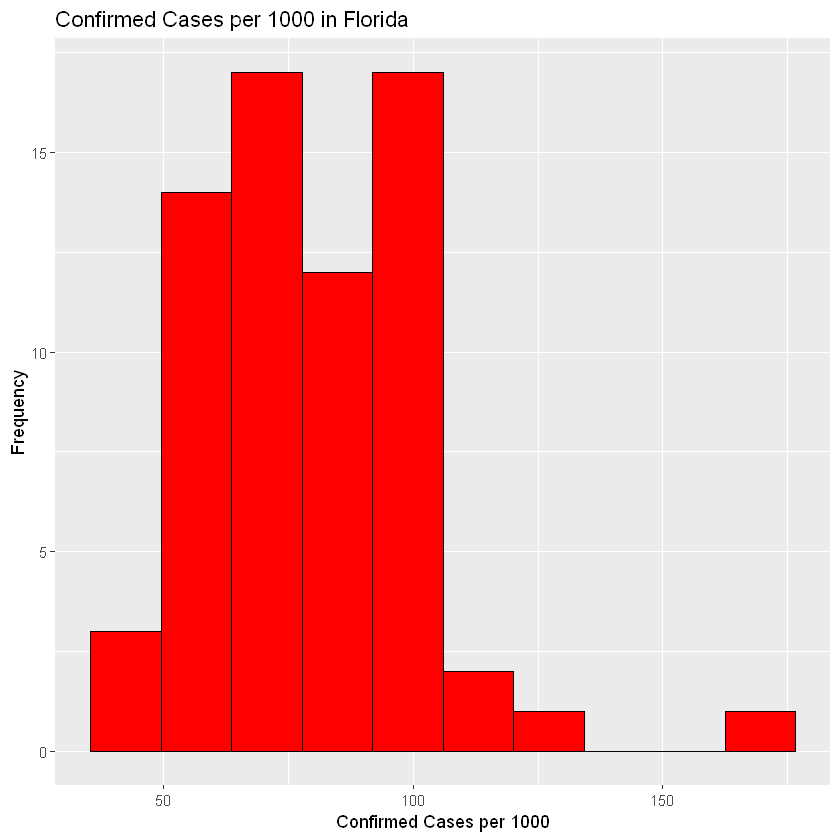

In [18]:
ggplot(cases_rates_FL, aes(x = cases_per_1000)) +
  geom_histogram(fill = "red", color = "black", bins=10) +
  labs(title = "Confirmed Cases per 1000 in Florida", x = "Confirmed Cases per 1000", y = "Frequency")

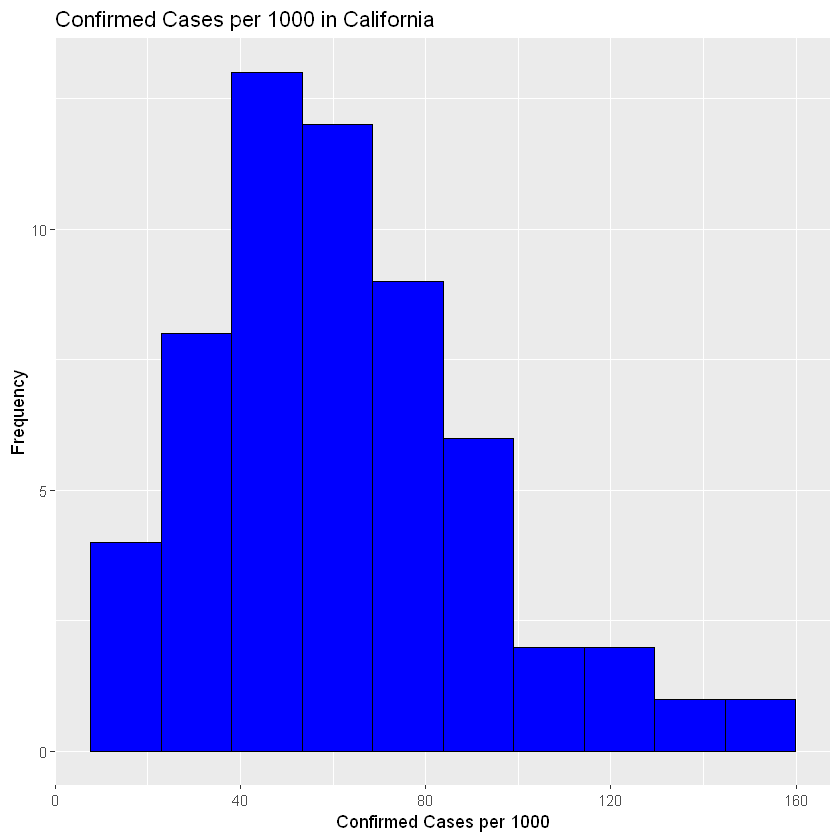

In [19]:
ggplot(cases_rates_CA, aes(x = cases_per_1000)) +
  geom_histogram(fill = "blue", color = "black", bins=10) +
  labs(title = "Confirmed Cases per 1000 in California", x = "Confirmed Cases per 1000", y = "Frequency")

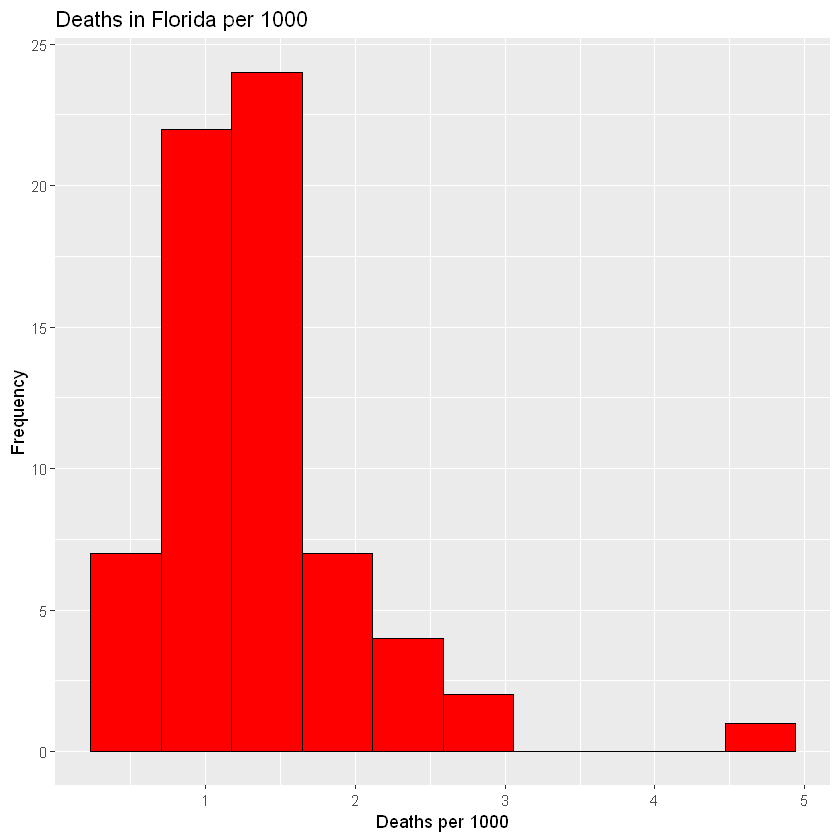

In [20]:
ggplot(cases_rates_FL, aes(x = deaths_per_1000)) +
  geom_histogram(fill = "red", color = "black", bins=10) +
  labs(title = "Deaths in Florida per 1000", x = "Deaths per 1000", y = "Frequency")

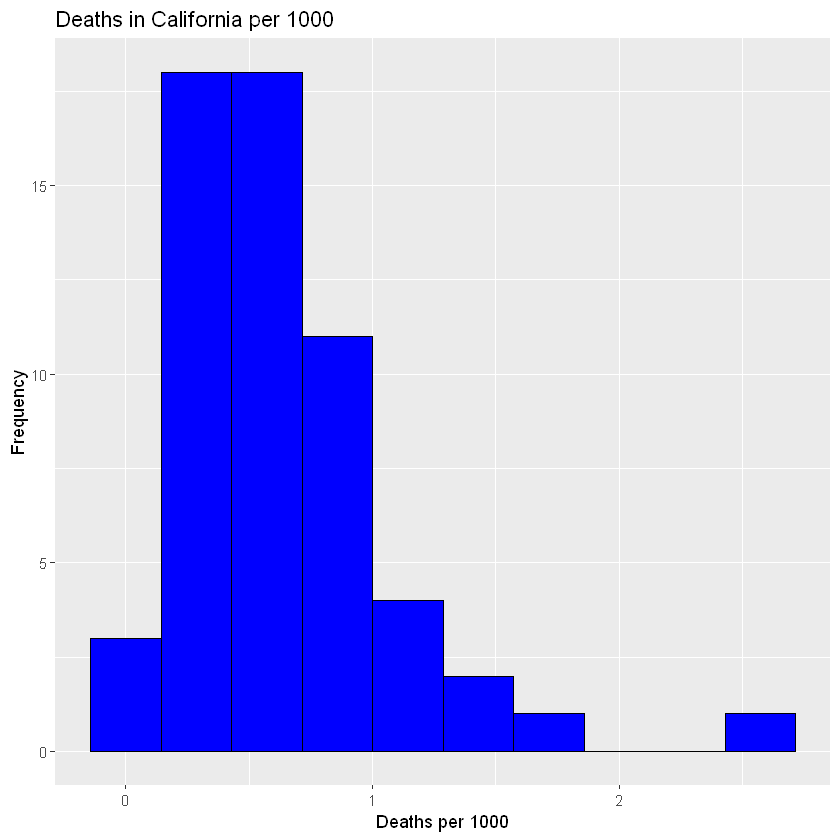

In [21]:
ggplot(cases_rates_CA, aes(x = deaths_per_1000)) +
  geom_histogram(fill = "blue", color = "black", bins=10) +
  labs(title = "Deaths in California per 1000", x = "Deaths per 1000", y = "Frequency")

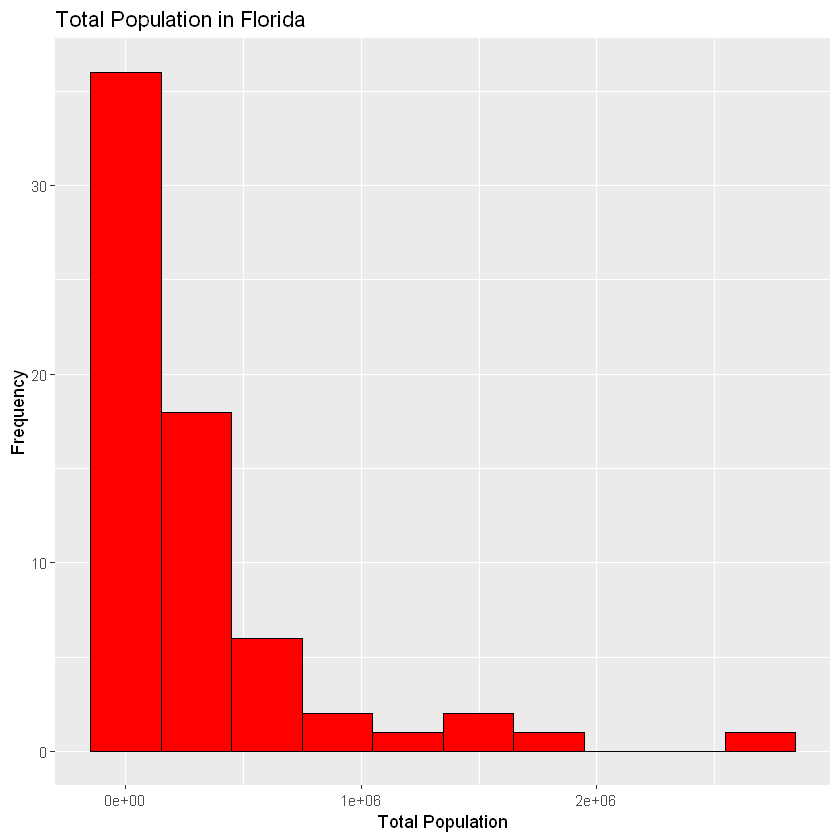

In [22]:
ggplot(cases_FL, aes(x = total_pop)) +
  geom_histogram(fill = "red", color = "black", bins=10) +
  labs(title = "Total Population in Florida", x = "Total Population", y = "Frequency")

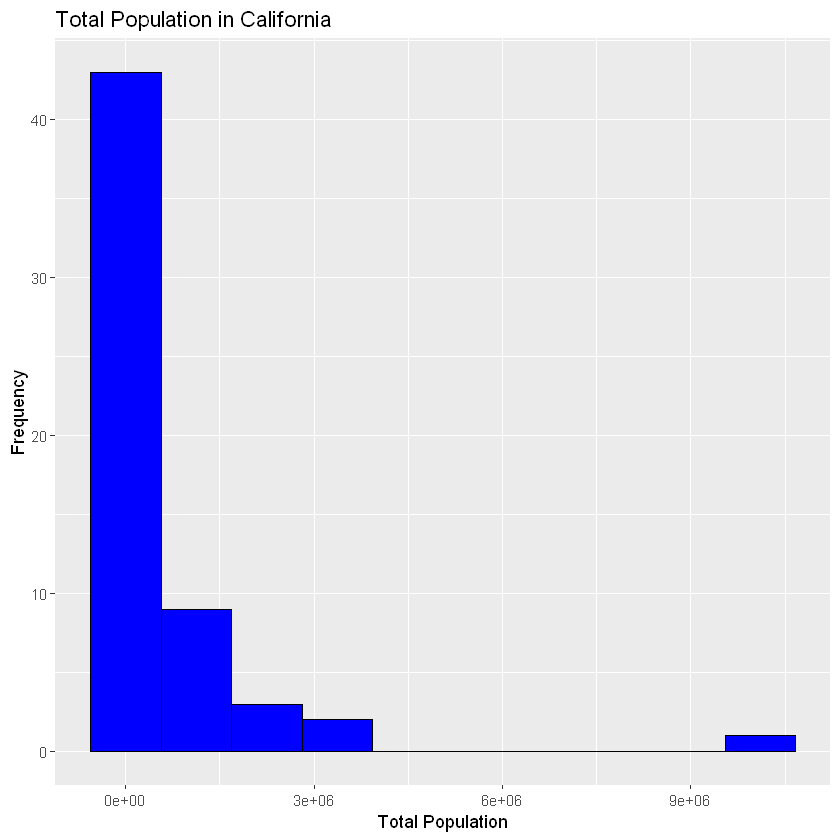

In [23]:
ggplot(cases_CA, aes(x = total_pop)) +
  geom_histogram(fill = "blue", color = "black", bins=10) +
  labs(title = "Total Population in California", x = "Total Population", y = "Frequency")

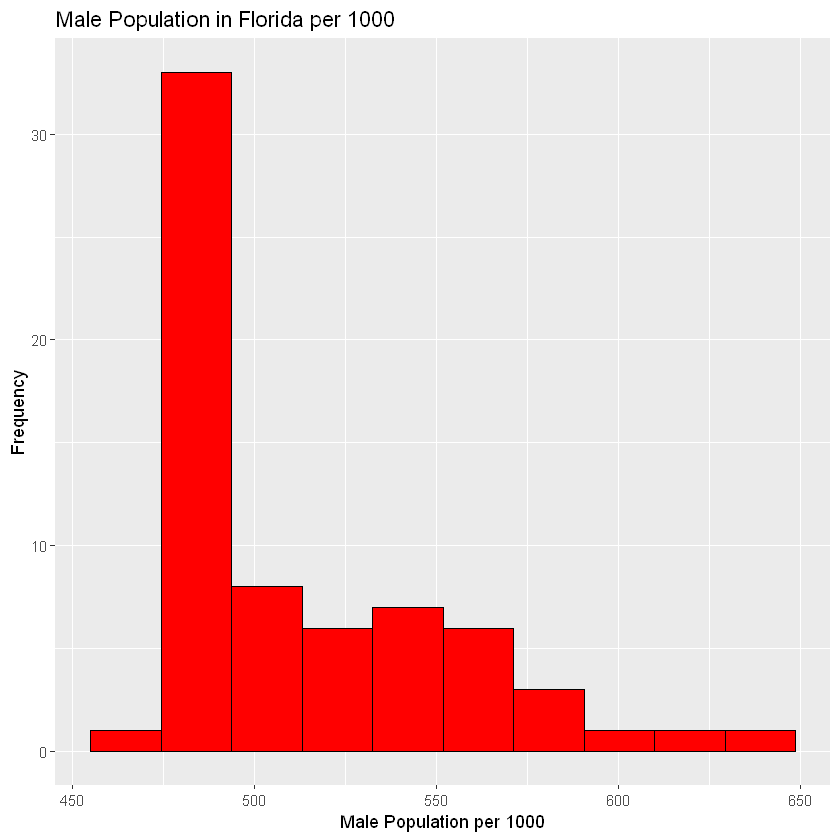

In [24]:
ggplot(cases_rates_FL, aes(x = male_per_1000)) +
  geom_histogram(fill = "red", color = "black", bins=10) +
  labs(title = "Male Population in Florida per 1000", x = "Male Population per 1000", y = "Frequency")

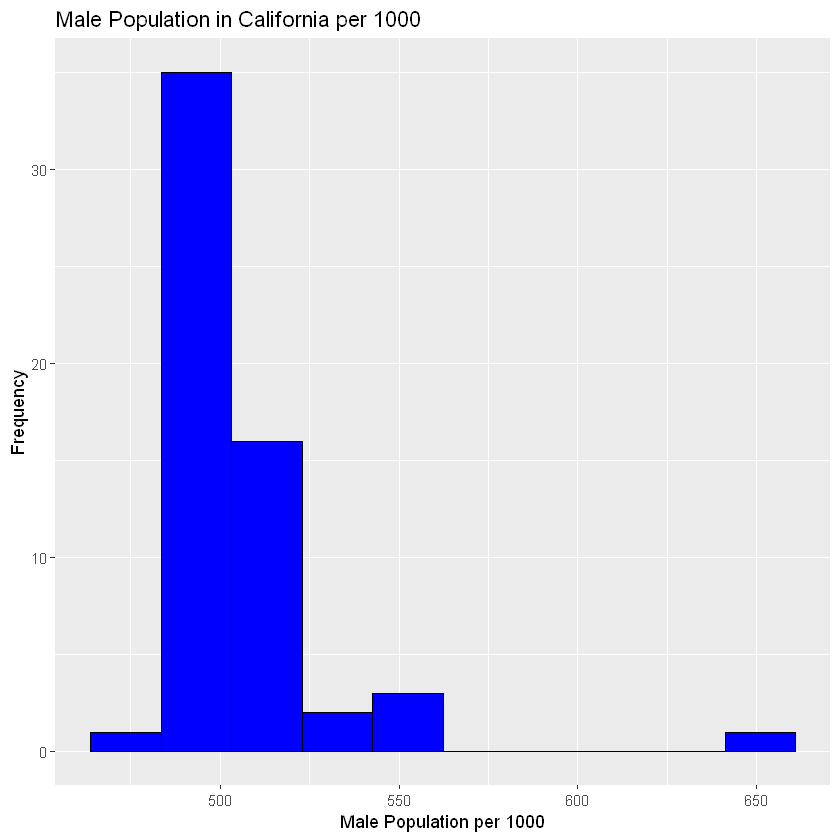

In [25]:
ggplot(cases_rates_CA, aes(x = male_per_1000)) +
  geom_histogram(fill = "blue", color = "black", bins=10) +
  labs(title = "Male Population in California per 1000", x = "Male Population per 1000", y = "Frequency")

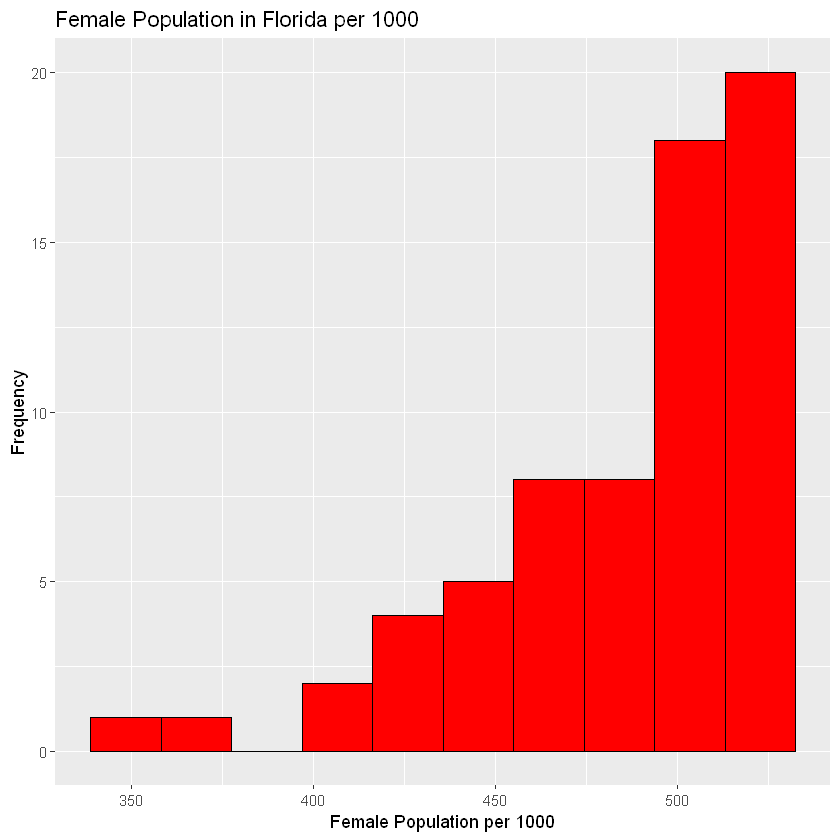

In [26]:
ggplot(cases_rates_FL, aes(x = female_per_1000)) +
  geom_histogram(fill = "red", color = "black", bins=10) +
  labs(title = "Female Population in Florida per 1000", x = "Female Population per 1000", y = "Frequency")

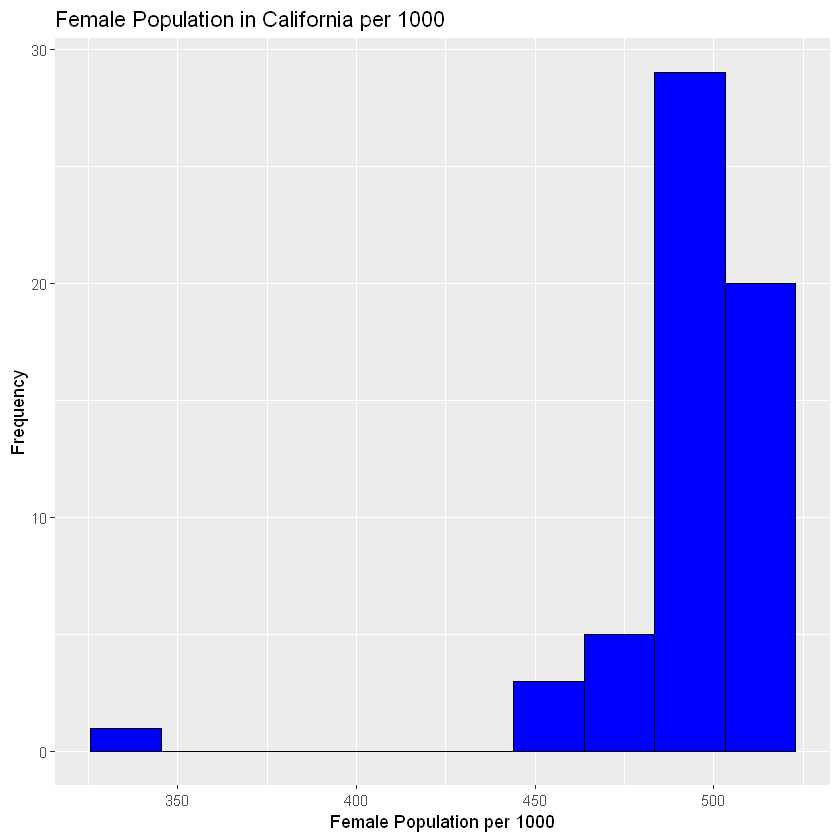

In [27]:
ggplot(cases_rates_CA, aes(x = female_per_1000)) +
  geom_histogram(fill = "blue", color = "black", bins=10) +
  labs(title = "Female Population in California per 1000", x = "Female Population per 1000", y = "Frequency")

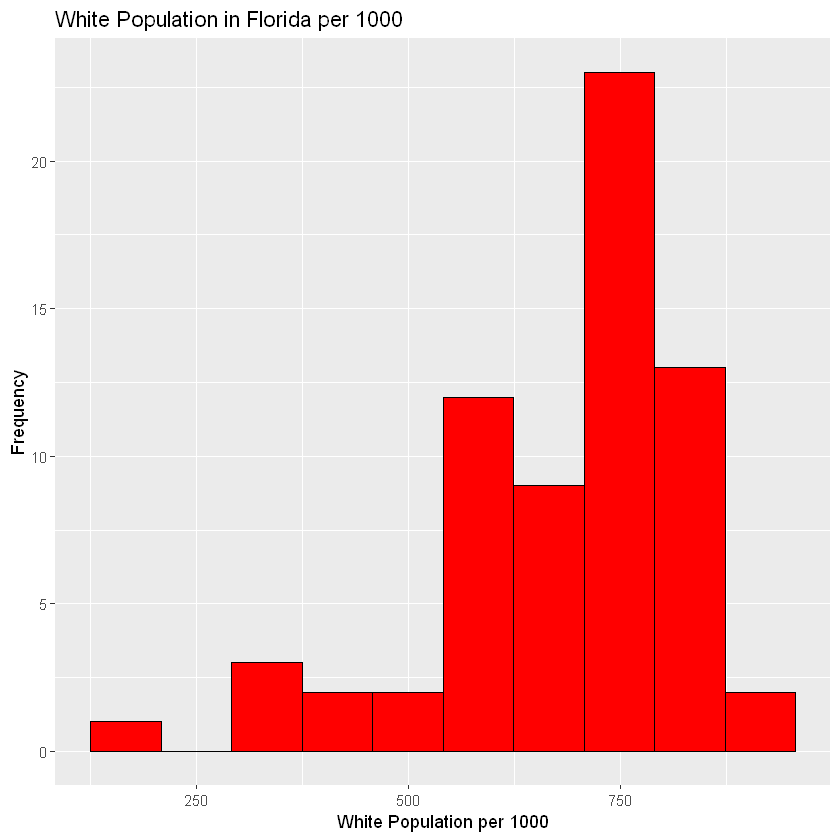

In [28]:
ggplot(cases_rates_FL, aes(x = white_per_1000)) +
  geom_histogram(fill = "red", color = "black", bins=10) +
  labs(title = "White Population in Florida per 1000", x = "White Population per 1000", y = "Frequency")

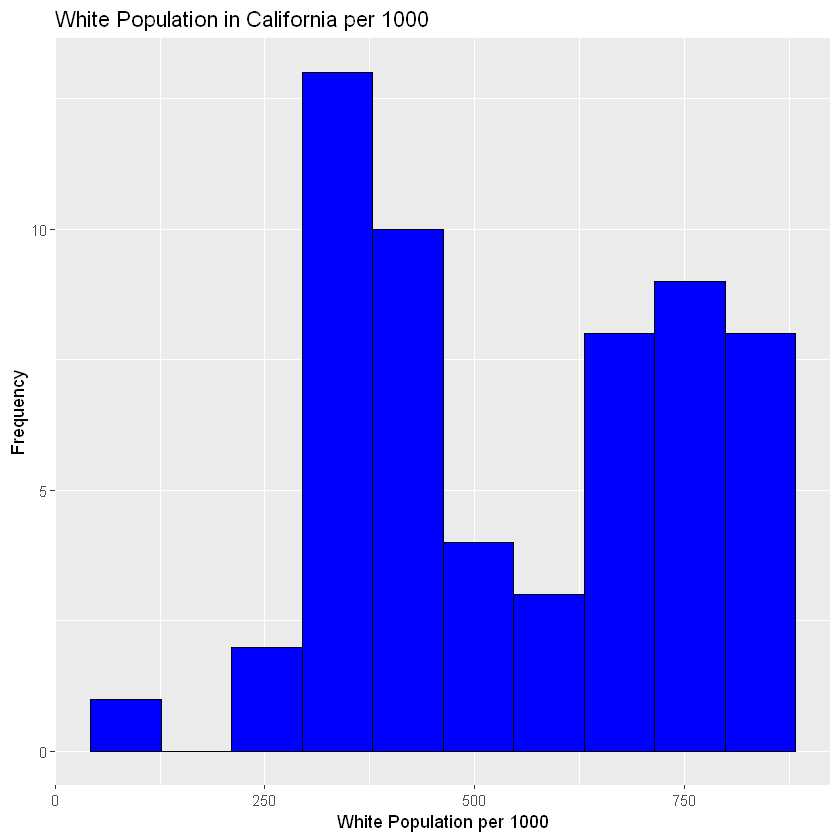

In [29]:
ggplot(cases_rates_CA, aes(x = white_per_1000)) +
  geom_histogram(fill = "blue", color = "black", bins=10) +
  labs(title = "White Population in California per 1000", x = "White Population per 1000", y = "Frequency")

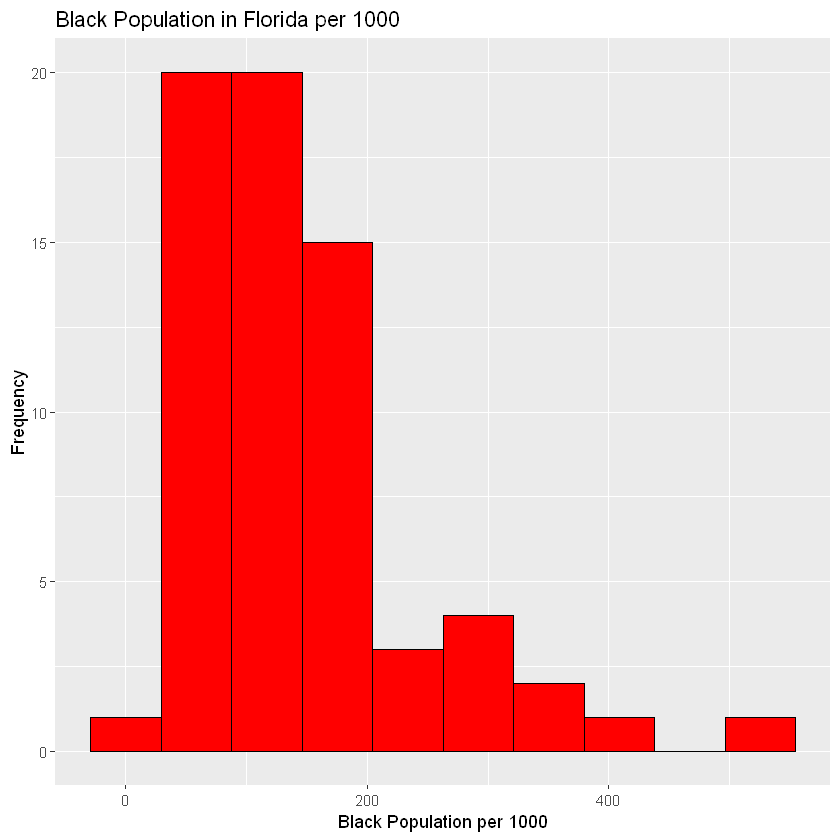

In [30]:
ggplot(cases_rates_FL, aes(x = black_per_1000)) +
  geom_histogram(fill = "red", color = "black", bins=10) +
  labs(title = "Black Population in Florida per 1000", x = "Black Population per 1000", y = "Frequency")

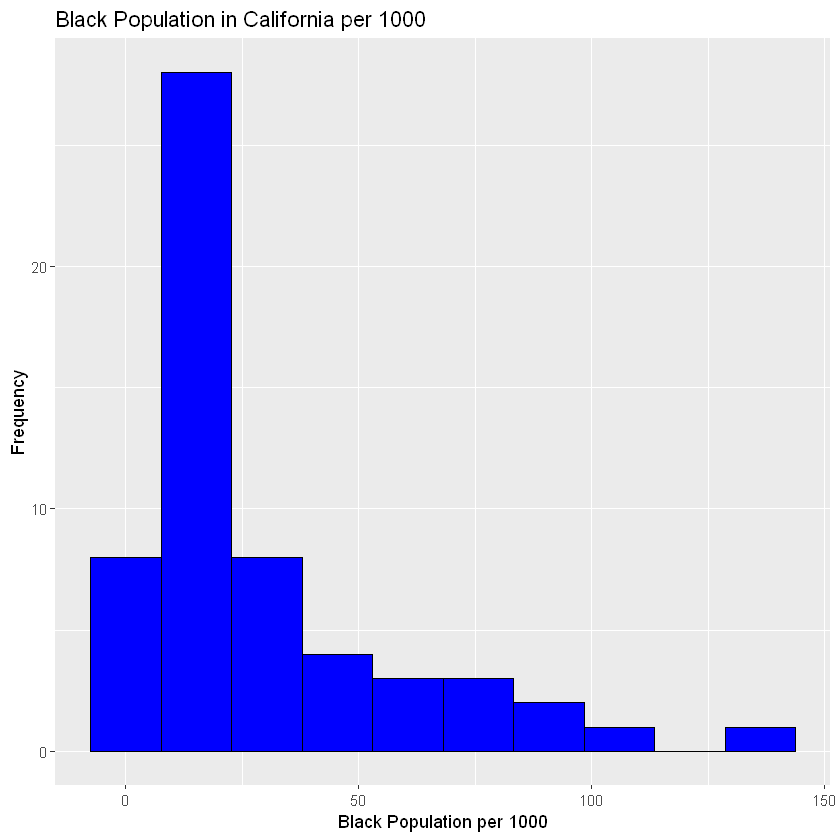

In [31]:
ggplot(cases_rates_CA, aes(x = black_per_1000)) +
  geom_histogram(fill = "blue", color = "black", bins=10) +
  labs(title = "Black Population in California per 1000", x = "Black Population per 1000", y = "Frequency")

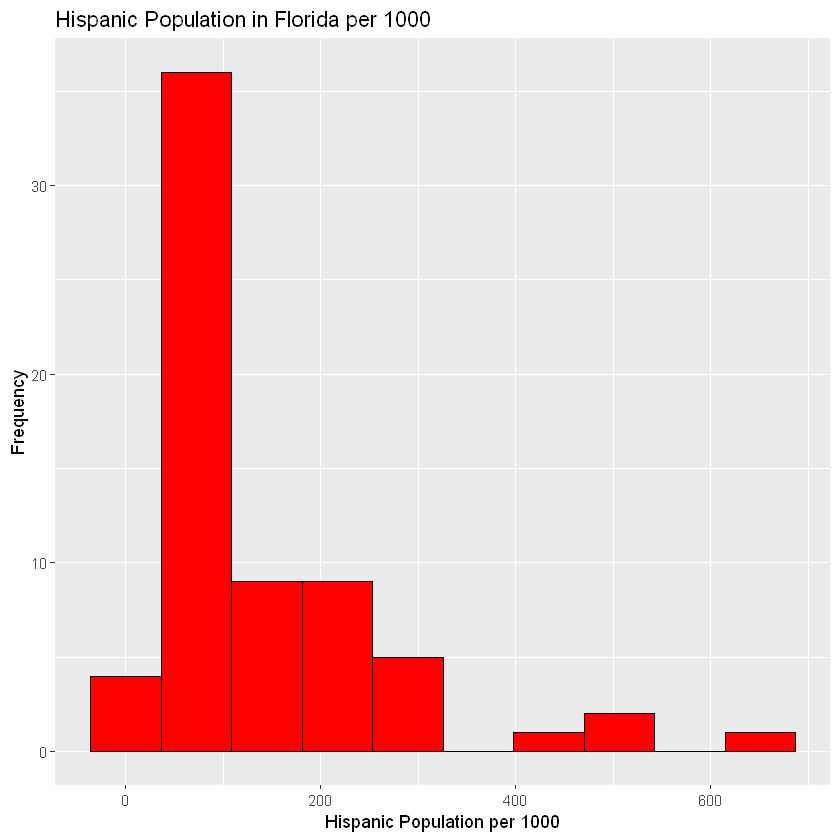

In [32]:
ggplot(cases_rates_FL, aes(x = hispanic_per_1000)) +
  geom_histogram(fill = "red", color = "black", bins=10) +
  labs(title = "Hispanic Population in Florida per 1000", x = "Hispanic Population per 1000", y = "Frequency")

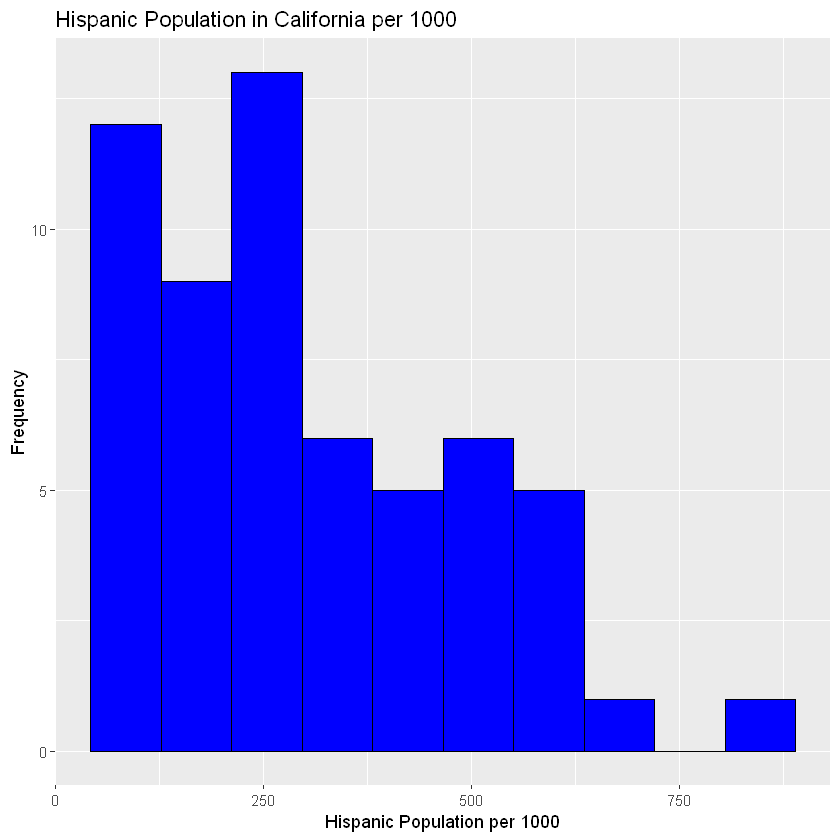

In [33]:
ggplot(cases_rates_CA, aes(x = hispanic_per_1000)) +
  geom_histogram(fill = "blue", color = "black", bins=10) +
  labs(title = "Hispanic Population in California per 1000", x = "Hispanic Population per 1000", y = "Frequency")

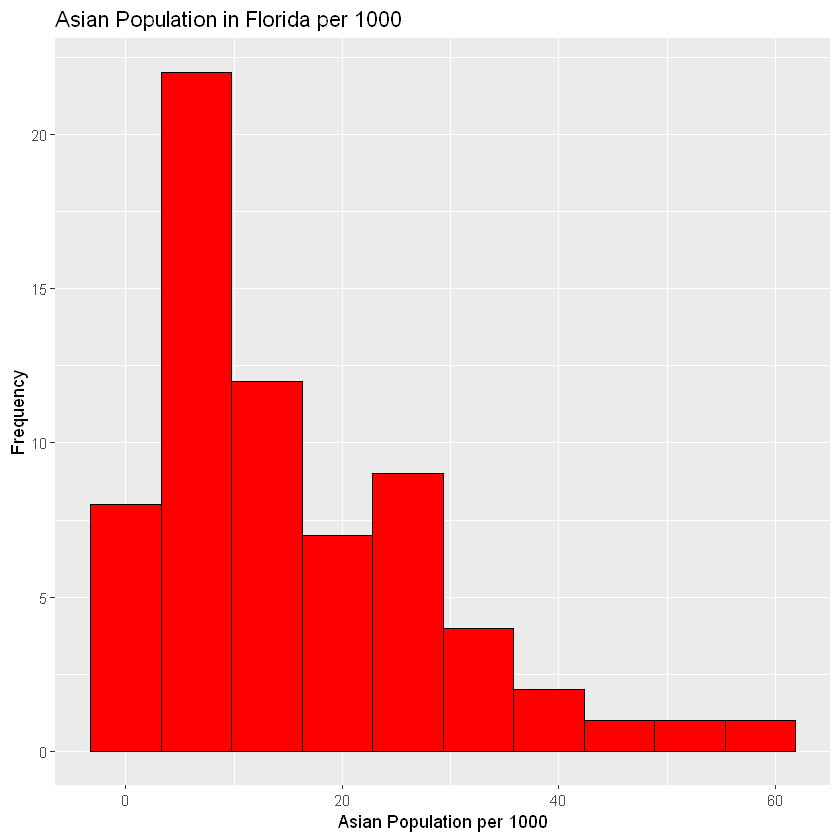

In [34]:
ggplot(cases_rates_FL, aes(x = asian_per_1000)) +
  geom_histogram(fill = "red", color = "black", bins=10) +
  labs(title = "Asian Population in Florida per 1000", x = "Asian Population per 1000", y = "Frequency")

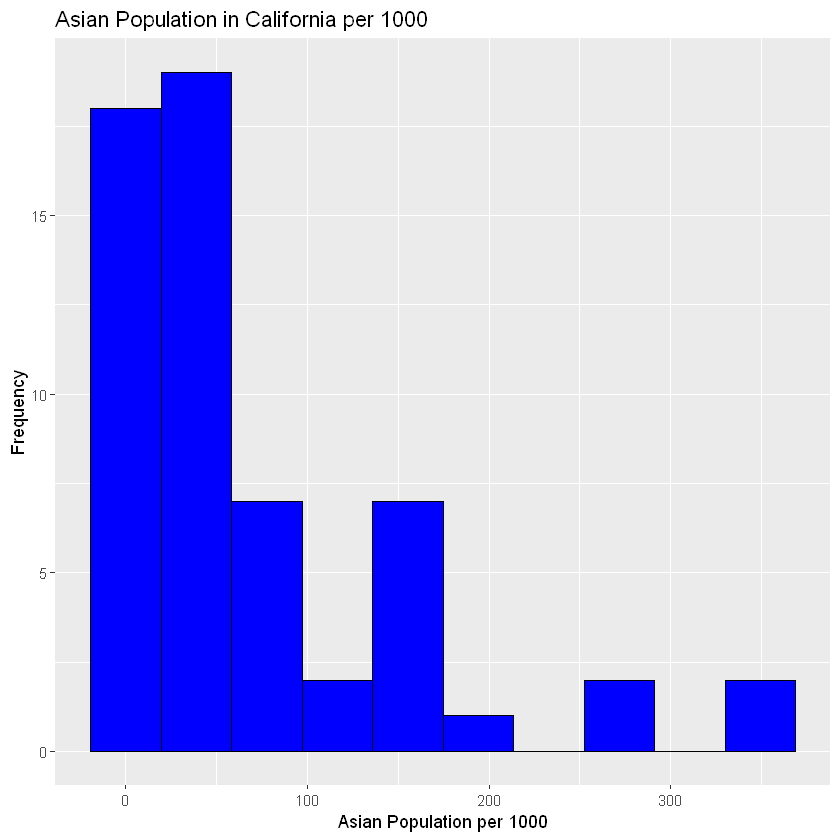

In [35]:
ggplot(cases_rates_CA, aes(x = asian_per_1000)) +
  geom_histogram(fill = "blue", color = "black", bins=10) +
  labs(title = "Asian Population in California per 1000", x = "Asian Population per 1000", y = "Frequency")

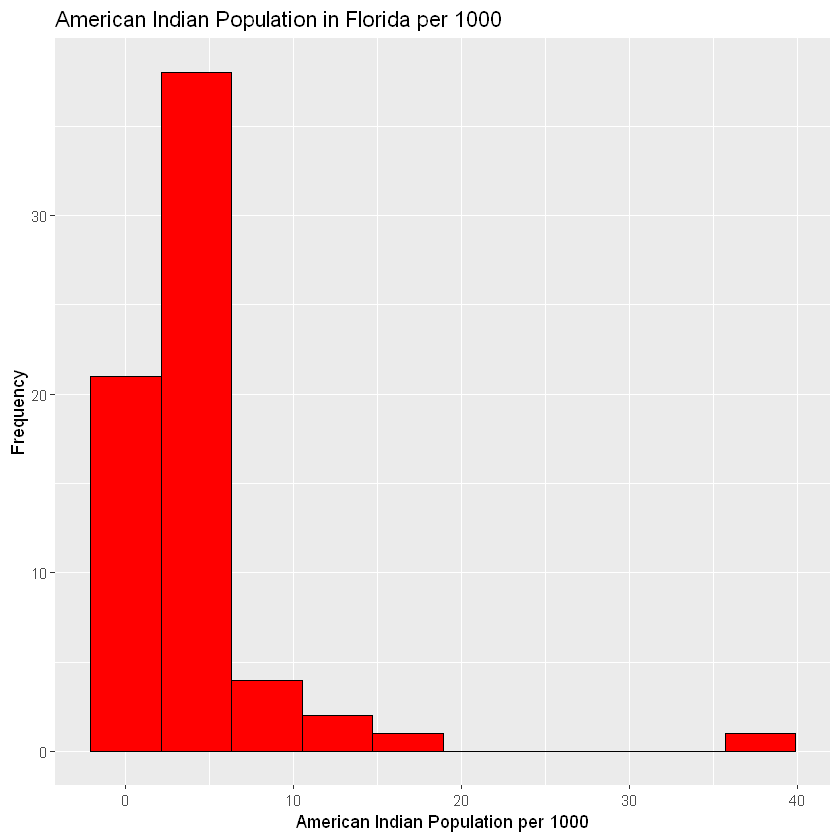

In [36]:
ggplot(cases_rates_FL, aes(x = amerindian_per_1000)) +
  geom_histogram(fill = "red", color = "black", bins=10) +
  labs(title = "American Indian Population in Florida per 1000", x = "American Indian Population per 1000", y = "Frequency")

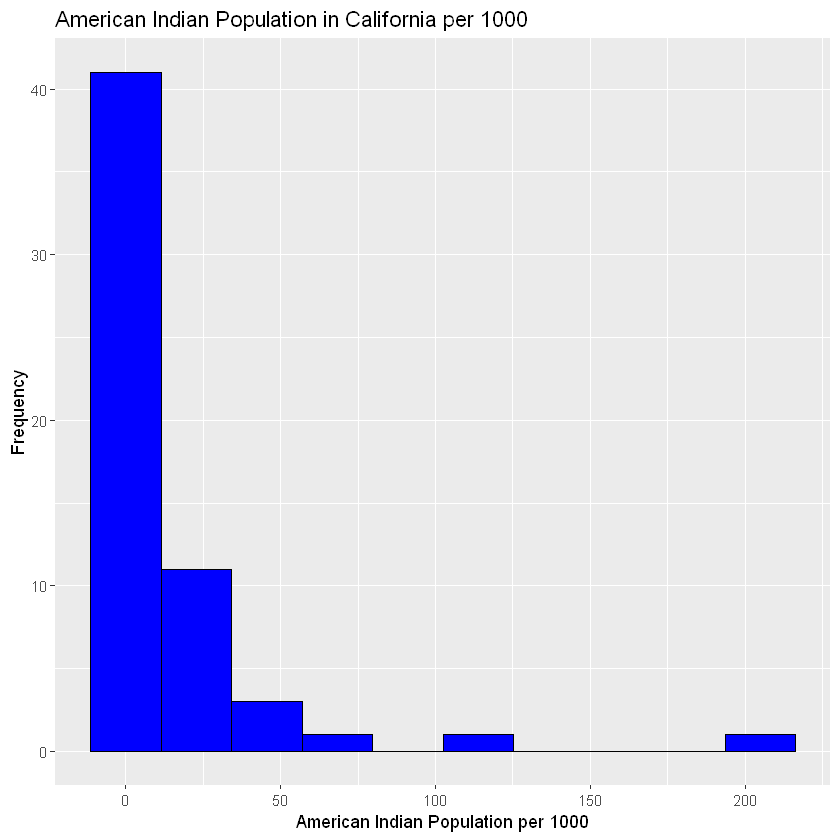

In [37]:
ggplot(cases_rates_CA, aes(x = amerindian_per_1000)) +
  geom_histogram(fill = "blue", color = "black", bins=10) +
  labs(title = "American Indian Population in California per 1000", x = "American Indian Population per 1000", y = "Frequency")

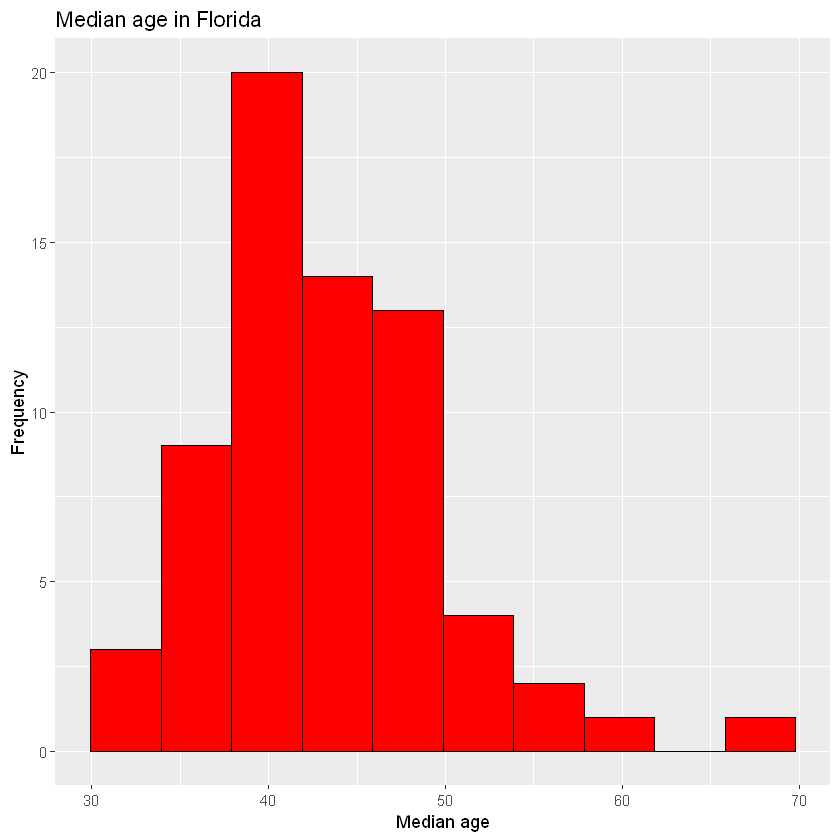

In [38]:
ggplot(cases_FL, aes(x = median_age)) +
  geom_histogram(fill = "red", color = "black", bins=10) +
  labs(title = "Median age in Florida", x = "Median age", y = "Frequency")

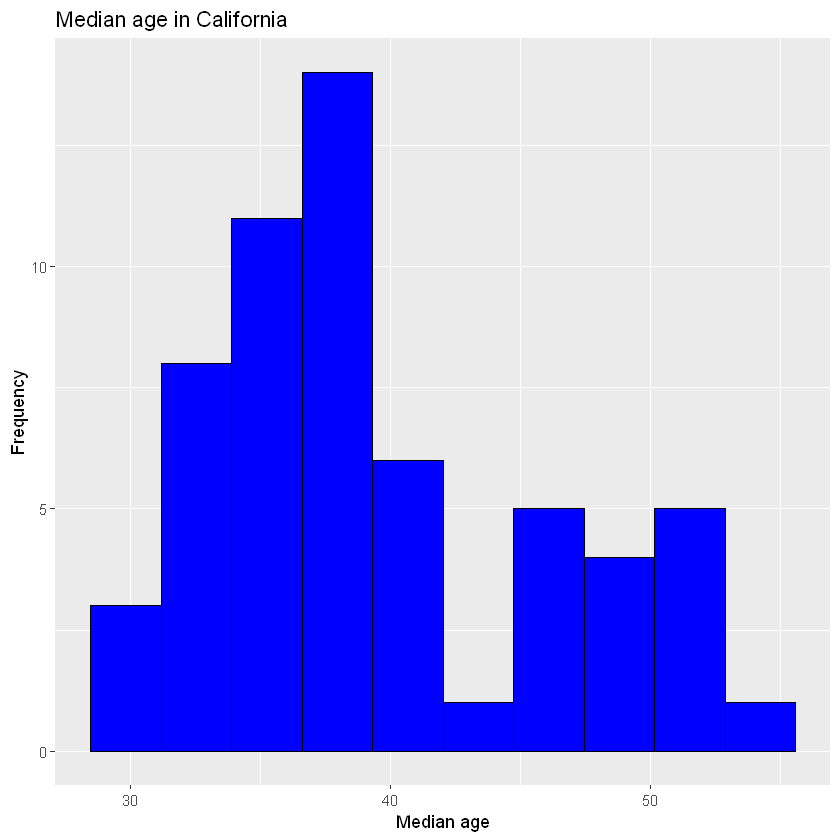

In [39]:
ggplot(cases_CA, aes(x = median_age)) +
  geom_histogram(fill = "blue", color = "black", bins=10) +
  labs(title = "Median age in California", x = "Median age", y = "Frequency")

In [40]:
# conda install -c conda-forge r-ggcorrplot to make this work 
library('ggcorrplot')
vars = c('male_per_1000','female_per_1000','black_per_1000','white_per_1000','asian_per_1000',
          'hispanic_per_1000','amerindian_per_1000','median_age','cases_per_1000','deaths_per_1000', 'death_per_case')
cor_FL <- cor(cases_rates_FL[,vars])
ggcorrplot(cor_FL, p.mat = cor_pmat(cases_rates_FL[,vars]), insig = "blank", hc.order = FALSE) +
labs(title = "Florida Correlation plot")

ERROR: Error in library("ggcorrplot"): there is no package called 'ggcorrplot'


In [ ]:
cor_CA <- cor(cases_rates_CA[,vars])
ggcorrplot(cor_CA, p.mat = cor_pmat(cases_rates_CA[,vars]), insig = "blank", hc.order = FALSE) +
labs(title = "California Correlation plot")

In [ ]:
ggplot(cases_rates_FL, mapping = aes(x = male_per_1000, y = cases_per_1000)) +
geom_smooth(method = lm) + geom_point() +
labs(title = "Florida Males per 1000 vs. Cases per 1000")

In [ ]:
ggplot(cases_rates_FL, mapping = aes(x = male_per_1000, y = deaths_per_1000)) +
geom_smooth(method = lm) + geom_point() +
labs(title = "Florida Males per 1000 vs. Deaths per 1000")

In [ ]:
ggplot(cases_rates_FL, mapping = aes(x = female_per_1000, y = deaths_per_1000)) +
geom_smooth(method = lm) + geom_point() +
labs(title = "Florida Females per 1000 vs. Deaths per 1000")

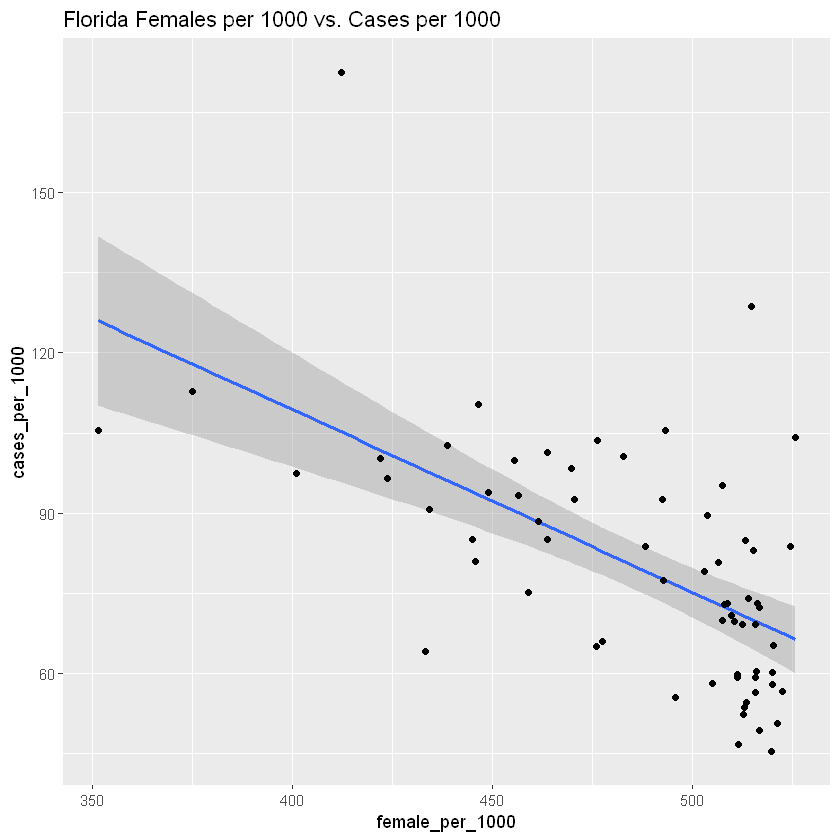

In [41]:
ggplot(cases_rates_FL, mapping = aes(x = female_per_1000, y = cases_per_1000)) +
geom_smooth(method = lm) + geom_point() +
labs(title = "Florida Females per 1000 vs. Cases per 1000")

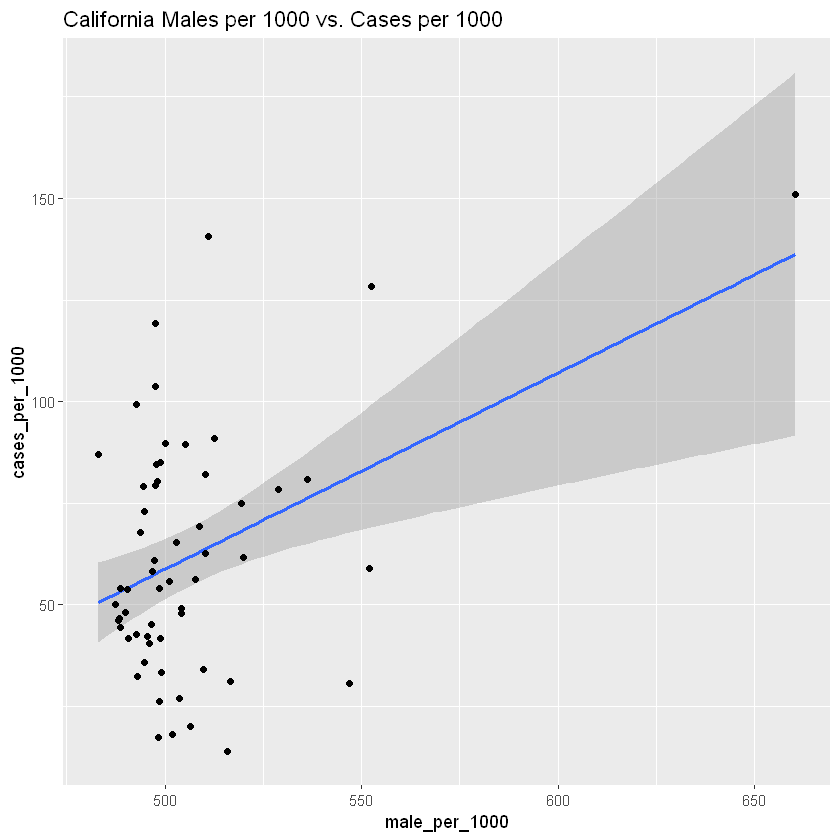

In [42]:
ggplot(cases_rates_CA, mapping = aes(x = male_per_1000, y = cases_per_1000)) +
geom_smooth(method = lm) + geom_point() +
labs(title = "California Males per 1000 vs. Cases per 1000")

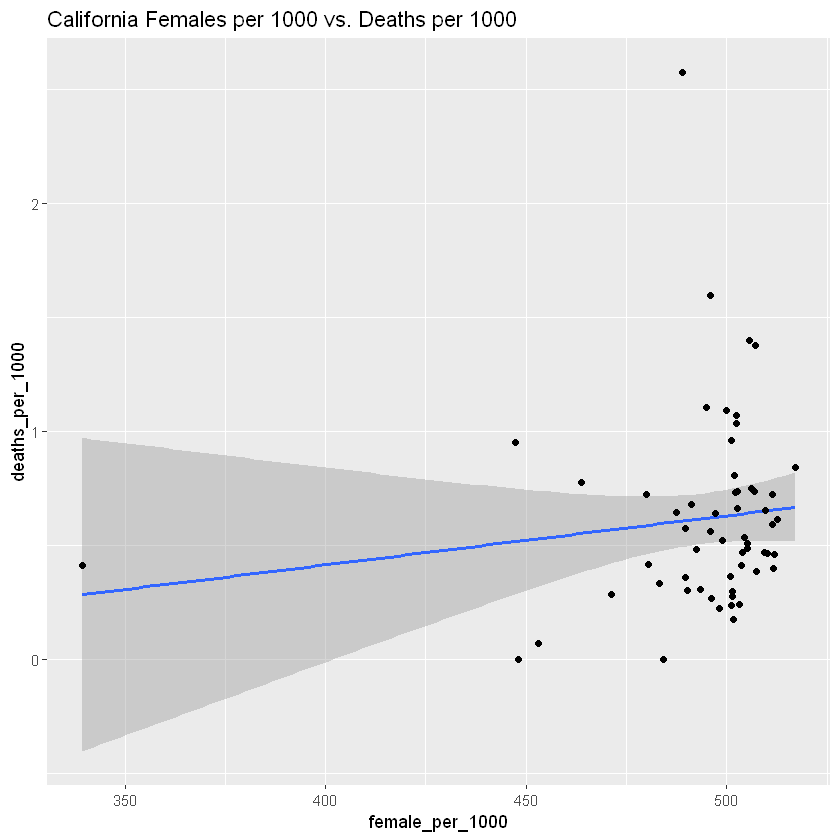

In [43]:
ggplot(cases_rates_CA, mapping = aes(x = female_per_1000, y = deaths_per_1000)) +
geom_smooth(method = lm) + geom_point() +
labs(title = "California Females per 1000 vs. Deaths per 1000")

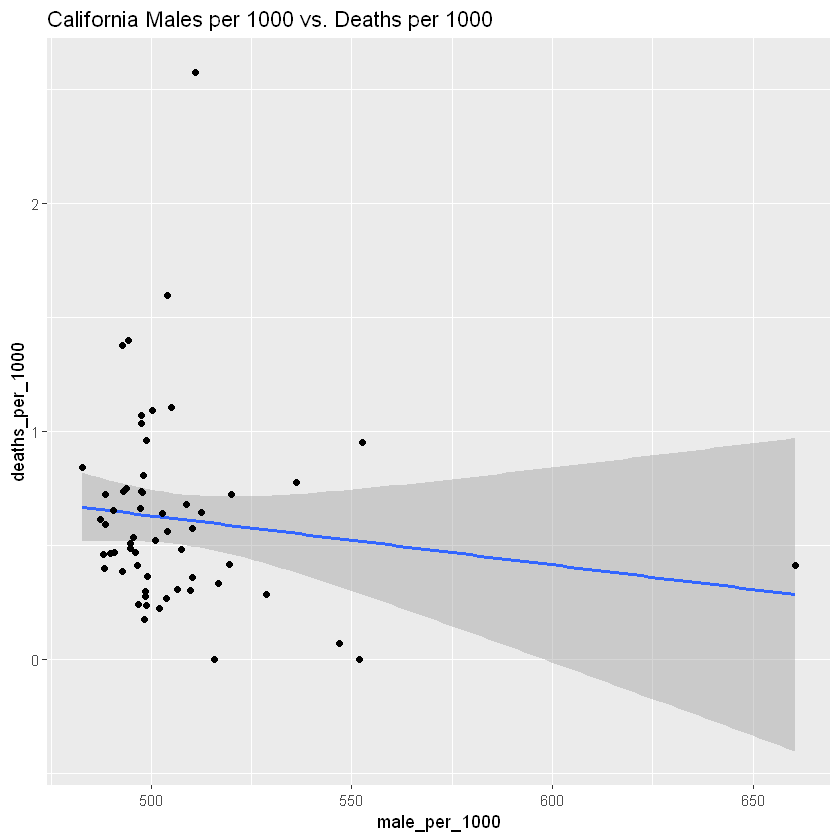

In [44]:
ggplot(cases_rates_CA, mapping = aes(x = male_per_1000, y = deaths_per_1000)) +
geom_smooth(method = lm) + geom_point() +
labs(title = "California Males per 1000 vs. Deaths per 1000")

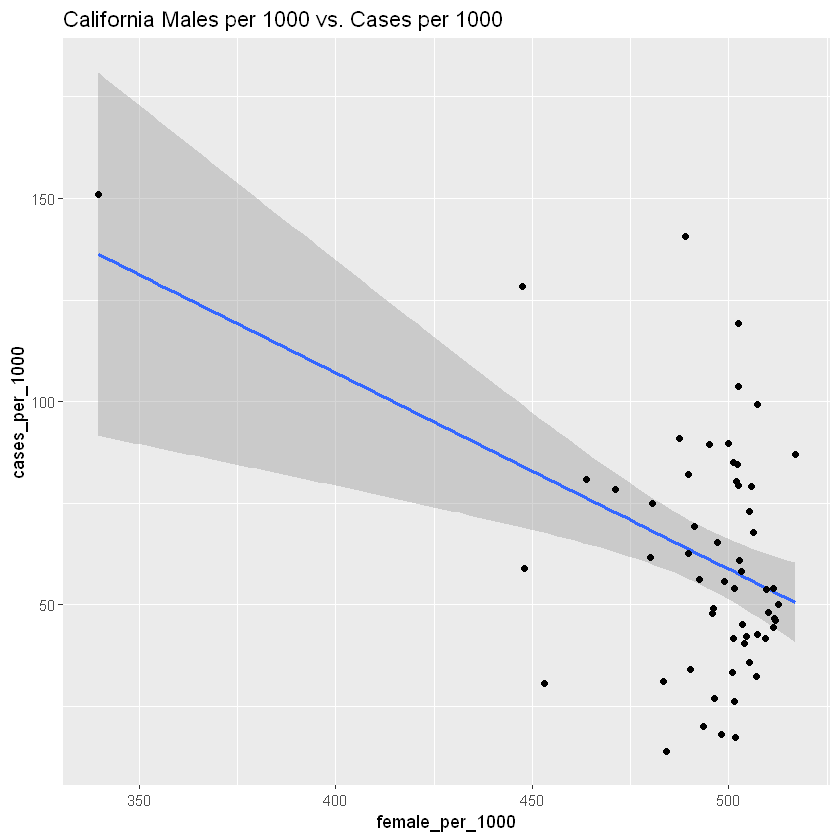

In [45]:
ggplot(cases_rates_CA, mapping = aes(x = female_per_1000, y = cases_per_1000)) +
geom_smooth(method = lm) + geom_point() +
labs(title = "California Males per 1000 vs. Cases per 1000")

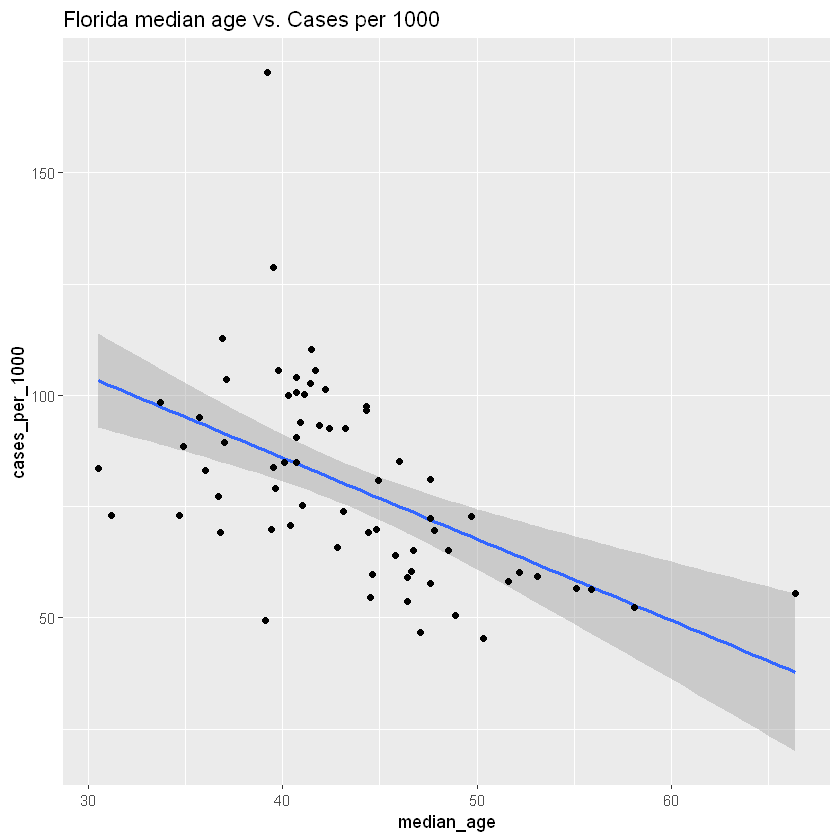

In [46]:
ggplot(cases_rates_FL, mapping = aes(x = median_age, y = cases_per_1000)) + 
geom_smooth(method = lm) + geom_point() +
labs(title = "Florida median age vs. Cases per 1000")

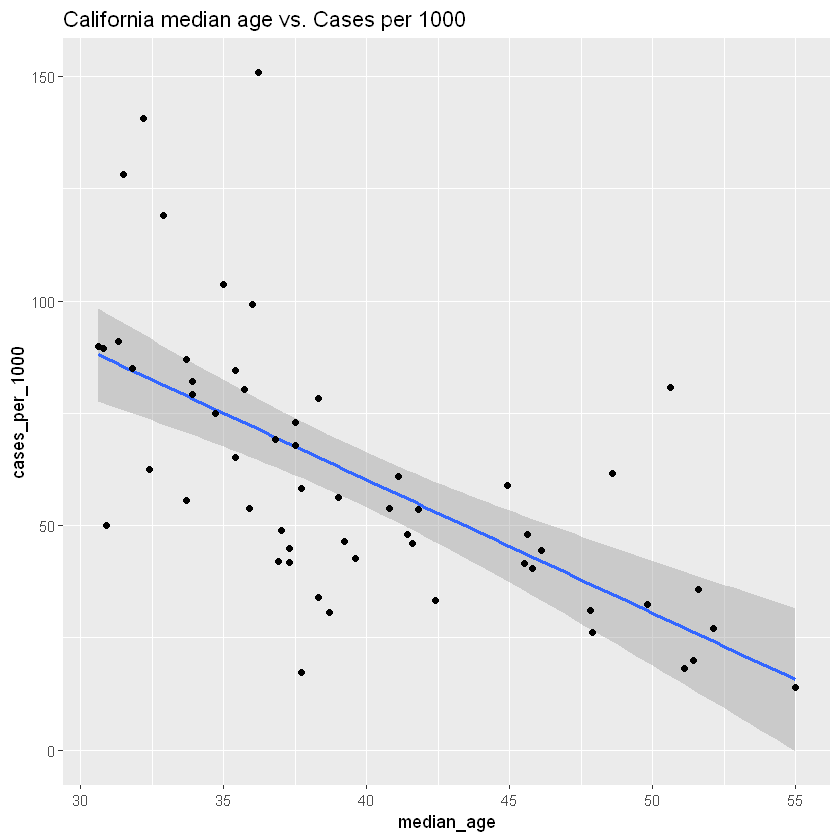

In [47]:
ggplot(cases_rates_CA, mapping = aes(x = median_age, y = cases_per_1000)) + 
geom_smooth(method = lm) + geom_point() +
labs(title = "California median age vs. Cases per 1000")

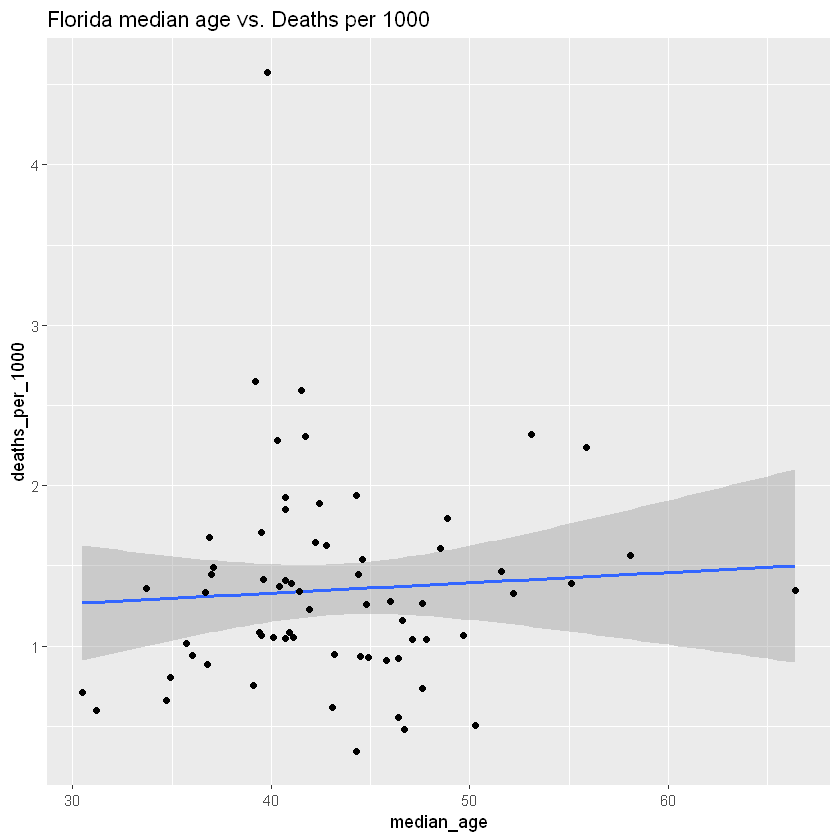

In [48]:
ggplot(cases_rates_FL, mapping = aes(x = median_age, y = deaths_per_1000)) + 
geom_smooth(method = lm) + geom_point() +
labs(title = "Florida median age vs. Deaths per 1000")

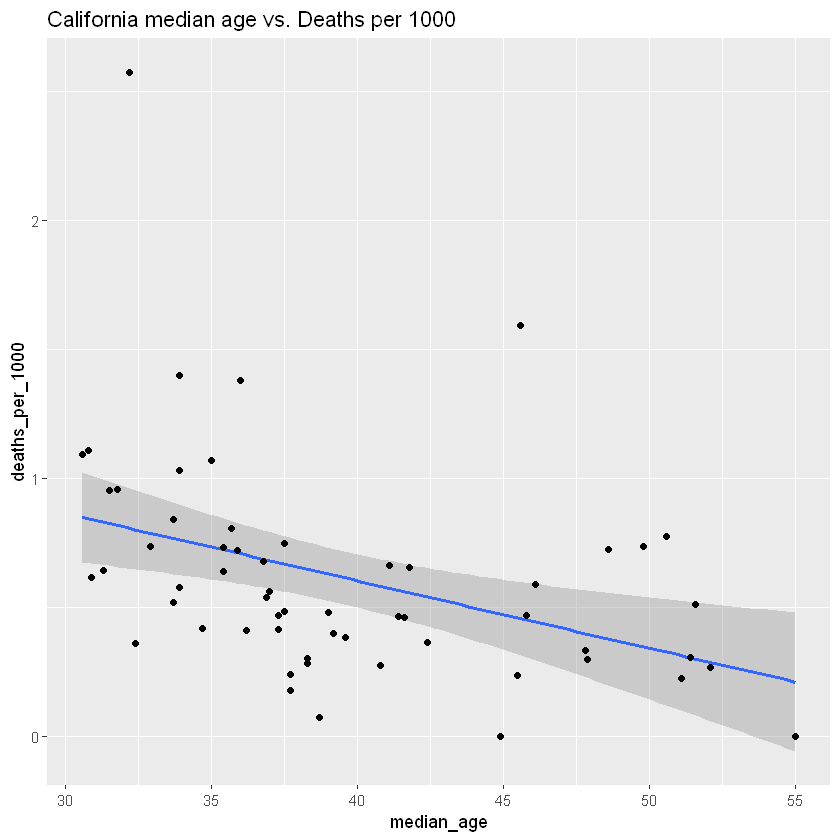

In [49]:
ggplot(cases_rates_CA, mapping = aes(x = median_age, y = deaths_per_1000)) + 
geom_smooth(method = lm) + geom_point() +
labs(title = "California median age vs. Deaths per 1000")

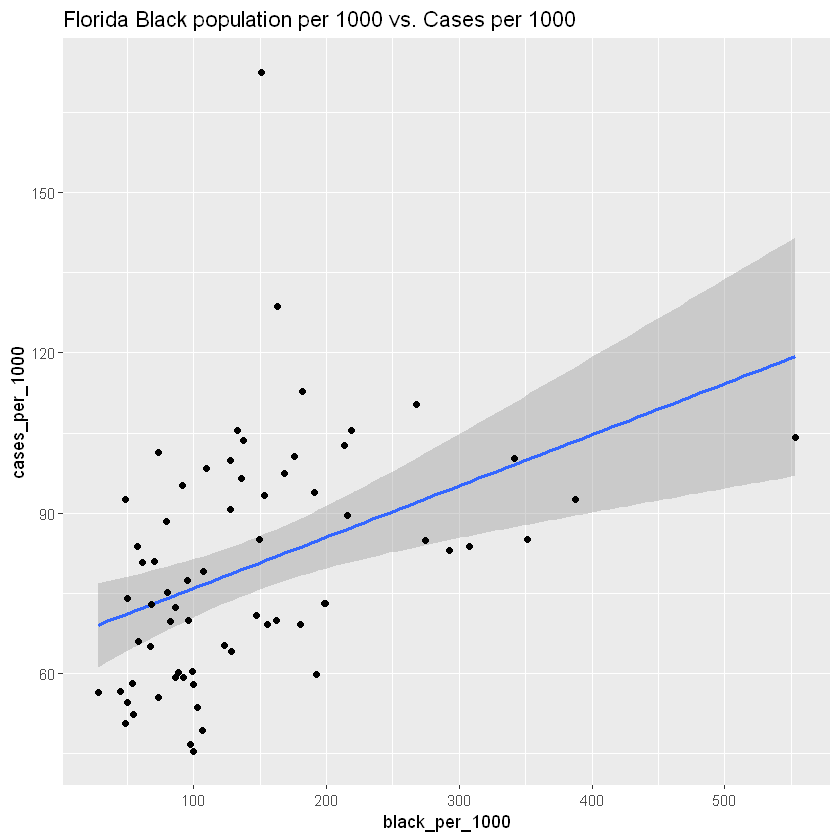

In [50]:
ggplot(cases_rates_FL, mapping = aes(x = black_per_1000, y = cases_per_1000)) + 
geom_smooth(method = lm) + geom_point() +
labs(title = "Florida Black population per 1000 vs. Cases per 1000")

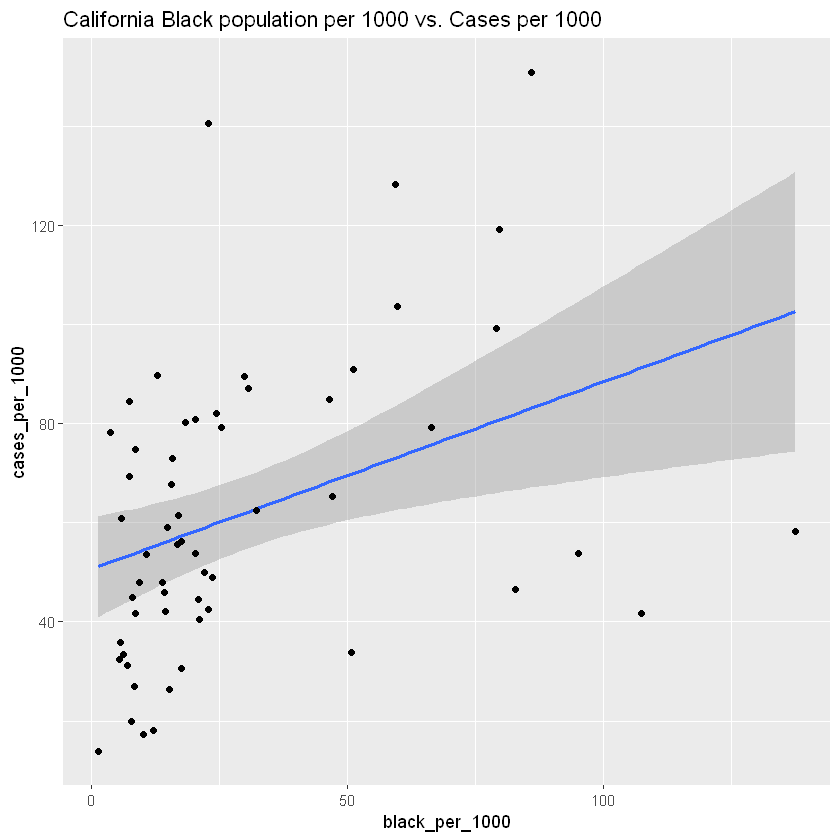

In [51]:
ggplot(cases_rates_CA, mapping = aes(x = black_per_1000, y = cases_per_1000)) + 
geom_smooth(method = lm) + geom_point() +
labs(title = "California Black population per 1000 vs. Cases per 1000")

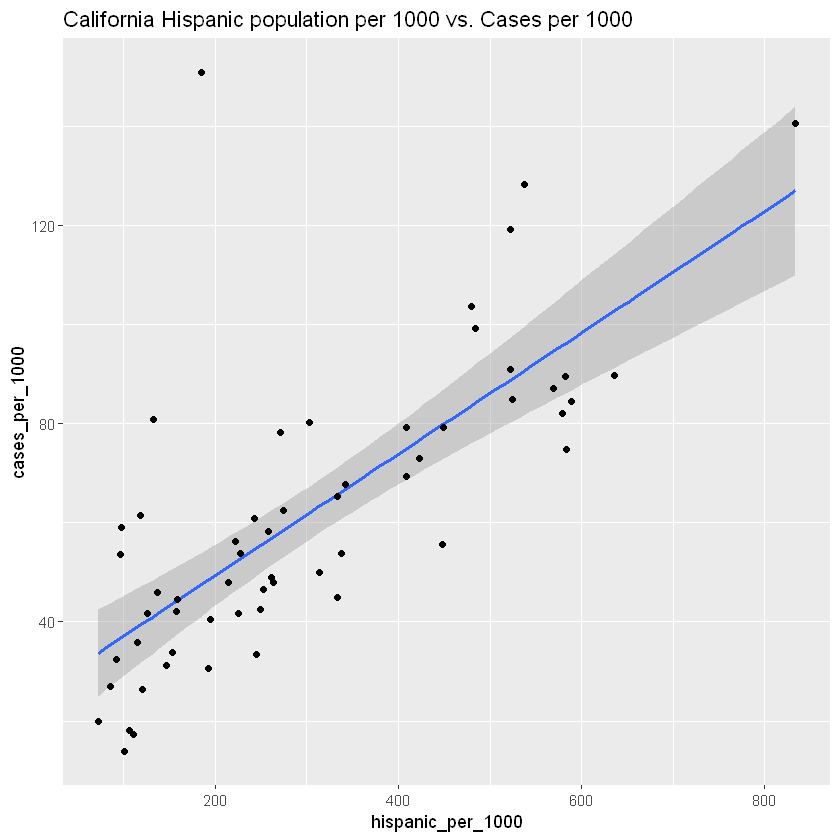

In [52]:
ggplot(cases_rates_CA, mapping = aes(x = hispanic_per_1000, y = cases_per_1000)) + 
geom_smooth(method = lm) + geom_point() +
labs(title = "California Hispanic population per 1000 vs. Cases per 1000")

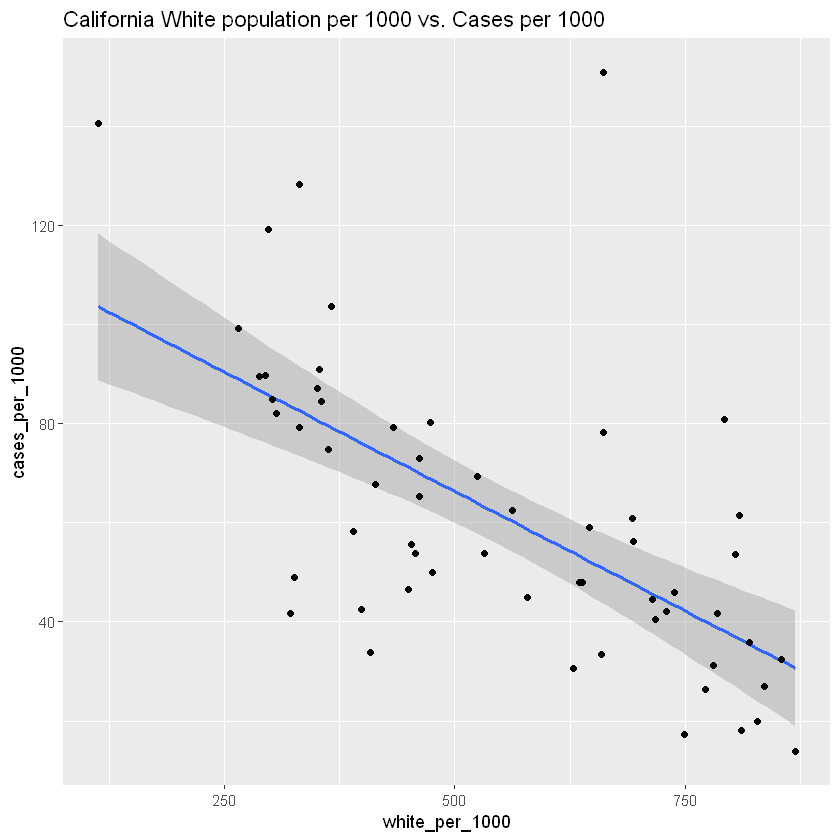

In [53]:
ggplot(cases_rates_CA, mapping = aes(x = white_per_1000, y = cases_per_1000)) + 
geom_smooth(method = lm) + geom_point() +
labs(title = "California White population per 1000 vs. Cases per 1000")

# 3 Data Preparation
In this section the dataset will be modified a little further to add in a few new attributes. Since the dataset has already been modified to account for the population differences between CA and FL, only a few extra attributes will be added

In [73]:
cases_rates_modified <- cases_rates %>% mutate(
    deaths_per_case = deaths/confirmed_cases,
    minority_pop = black_pop + asian_pop + hispanic_pop + amerindian_pop,
    minority_per_1000 = minority_pop/total_pop*1000
)
cases_rates_modified_CA <- cases_rates_CA %>% mutate(
    deaths_per_case = deaths/confirmed_cases,
    minority_pop = black_pop + asian_pop + hispanic_pop + amerindian_pop,
    minority_per_1000 = minority_pop/total_pop*1000
)
cases_rates_modified_FL <- cases_rates_FL %>% mutate(
    deaths_per_case = deaths/confirmed_cases,
    minority_pop = black_pop + asian_pop + hispanic_pop + amerindian_pop,
    minority_per_1000 = minority_pop/total_pop*1000
)


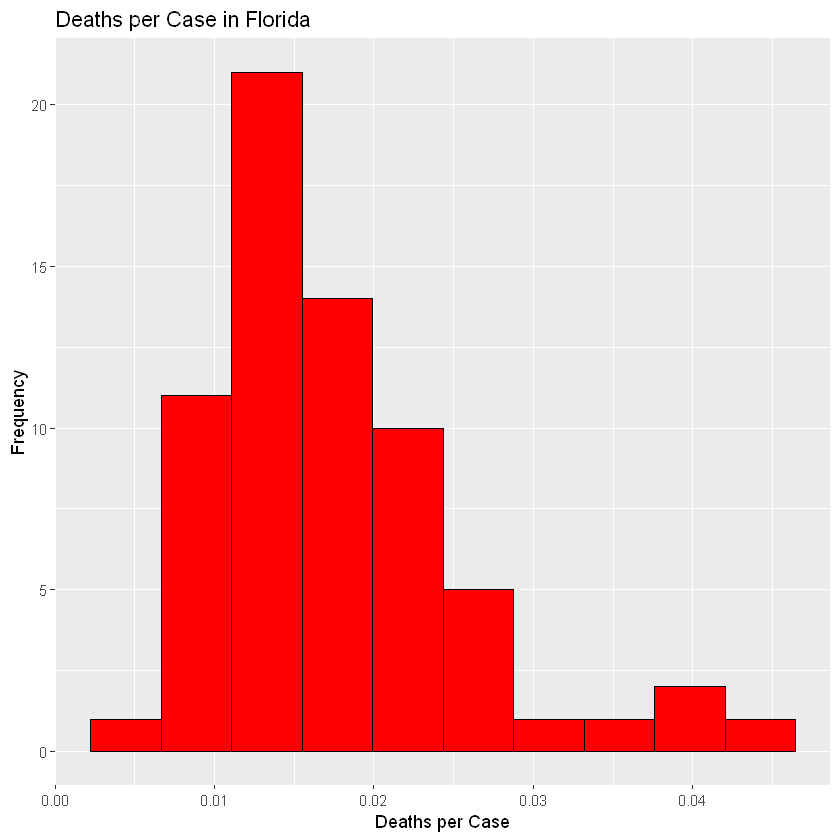

In [74]:
ggplot(cases_rates_modified_FL, aes(x = deaths_per_case)) +
  geom_histogram(fill = "red", color = "black", bins=10) +
  labs(title = "Deaths per Case in Florida", x = "Deaths per Case", y = "Frequency")

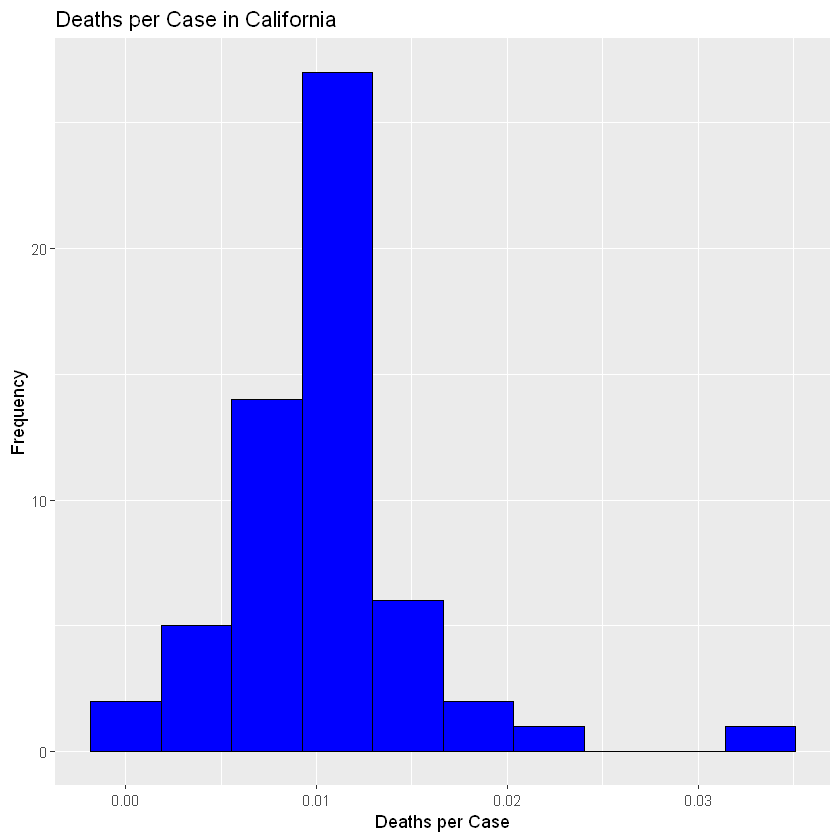

In [75]:
ggplot(cases_rates_modified_CA, aes(x = deaths_per_case)) +
  geom_histogram(fill = "blue", color = "black", bins=10) +
  labs(title = "Deaths per Case in California", x = "Deaths per Case", y = "Frequency")

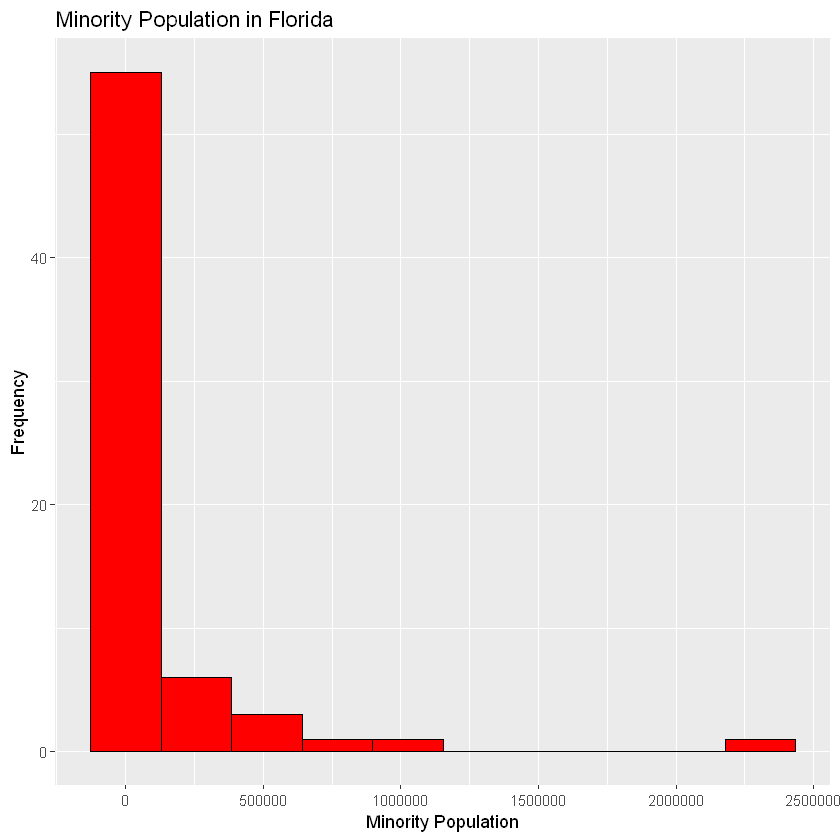

In [76]:
ggplot(cases_rates_modified_FL, aes(x = minority_pop)) +
  geom_histogram(fill = "red", color = "black", bins=10) +
  labs(title = "Minority Population in Florida", x = "Minority Population", y = "Frequency")

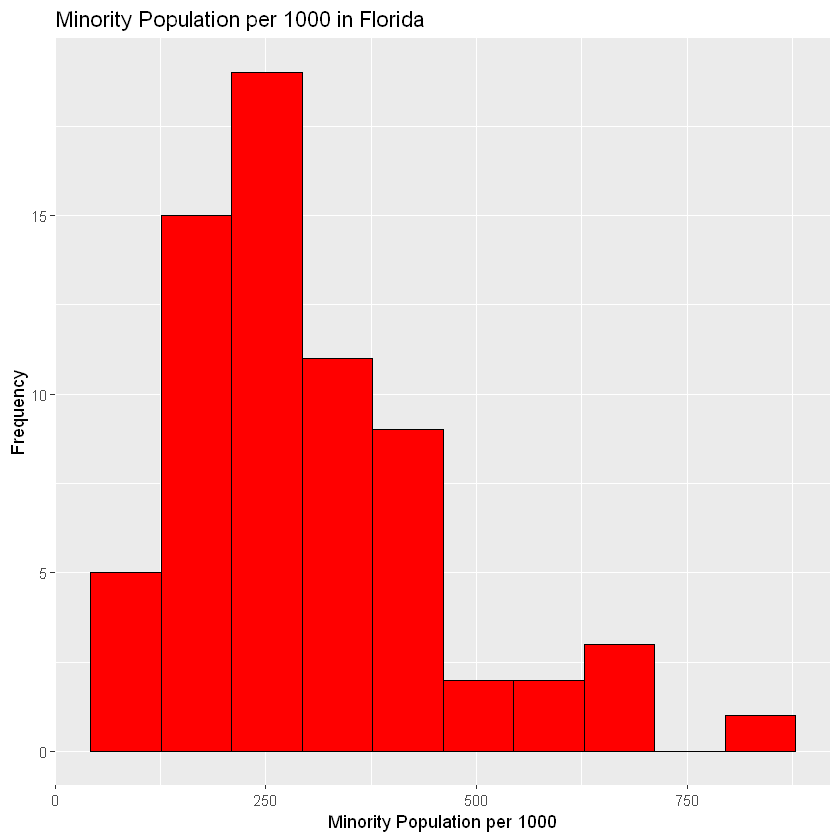

In [77]:
ggplot(cases_rates_modified_FL, aes(x = minority_per_1000)) +
  geom_histogram(fill = "red", color = "black", bins=10) +
  labs(title = "Minority Population per 1000 in Florida", x = "Minority Population per 1000", y = "Frequency")

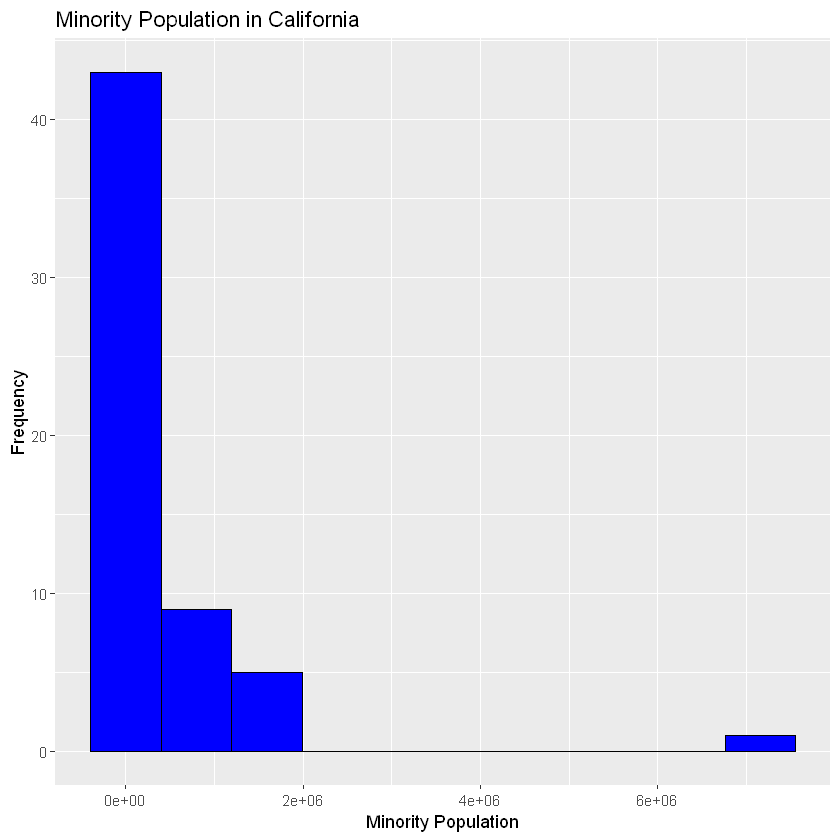

In [78]:
ggplot(cases_rates_modified_CA, aes(x = minority_pop)) +
  geom_histogram(fill = "blue", color = "black", bins=10) +
  labs(title = "Minority Population in California", x = "Minority Population", y = "Frequency")

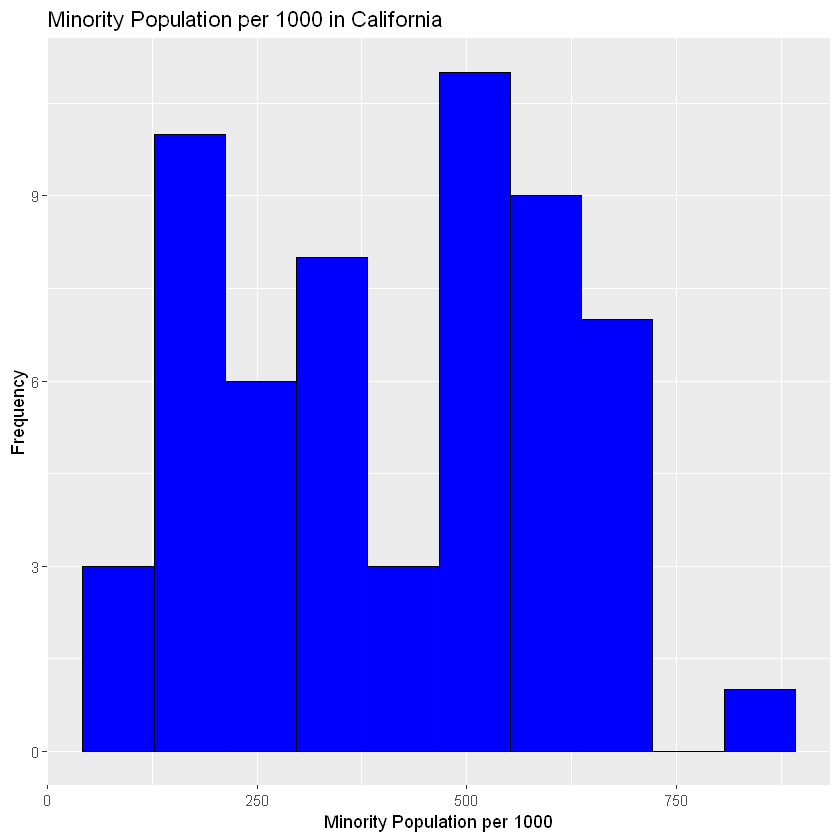

In [79]:
ggplot(cases_rates_modified_CA, aes(x = minority_per_1000)) +
  geom_histogram(fill = "blue", color = "black", bins=10) +
  labs(title = "Minority Population per 1000 in California", x = "Minority Population per 1000", y = "Frequency")

# 4 Exceptional Work

In [54]:
mobility <- read_csv("Global_Mobility_Report.csv", col_types =  cols(sub_region_2 = col_character()))
mobility <- mobility %>% mutate_if(is.character, factor)
dim(mobility)
summary(mobility)

Warning message:
"874357 parsing failures.
 row        col           expected                  actual                         file
3036 metro_area 1/0/T/F/TRUE/FALSE Kabul Metropolitan Area 'Global_Mobility_Report.csv'
3037 metro_area 1/0/T/F/TRUE/FALSE Kabul Metropolitan Area 'Global_Mobility_Report.csv'
3038 metro_area 1/0/T/F/TRUE/FALSE Kabul Metropolitan Area 'Global_Mobility_Report.csv'
3039 metro_area 1/0/T/F/TRUE/FALSE Kabul Metropolitan Area 'Global_Mobility_Report.csv'
3040 metro_area 1/0/T/F/TRUE/FALSE Kabul Metropolitan Area 'Global_Mobility_Report.csv'
.... .......... .................. ....................... ............................
See problems(...) for more details.
"

[1] 3991405      14

 country_region_code        country_region   
 US     : 869690     United States : 869690  
 BR     : 638745     Brazil        : 638745  
 IN     : 227589     India         : 227589  
 TR     : 180337     Turkey        : 180337  
 GB     : 142583     United Kingdom: 142583  
 (Other):1929917     Argentina     : 140061  
 NA's   :   2544     (Other)       :1792400  
                     sub_region_1                sub_region_2    
 State of São Paulo        : 119671   Washington County:   9110  
 State of Minas Gerais     :  82551   Jefferson County :   7555  
 Texas                     :  64162   Franklin County  :   7122  
 State of Rio Grande do Sul:  49369   Jackson County   :   6516  
 State of Paraná           :  48479   Lincoln County   :   6213  
 (Other)                   :3558930   (Other)          :3288343  
 NA's                      :  68243   NA's             : 666546  
 metro_area     iso_3166_2_code   census_fips_code      date           
 Mode:logical   AE-AJ  :    343 

In [55]:
mobility_FL <- mobility %>% filter(sub_region_1 == "Florida")
mobility_CA <- mobility %>% filter(sub_region_1 == "California")


`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'
Warning message:
"Removed 3997 rows containing non-finite values (stat_smooth)."`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'
Warning message:
"Removed 399 rows containing non-finite values (stat_smooth)."`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'
Warning message:
"Removed 6855 rows containing non-finite values (stat_smooth)."

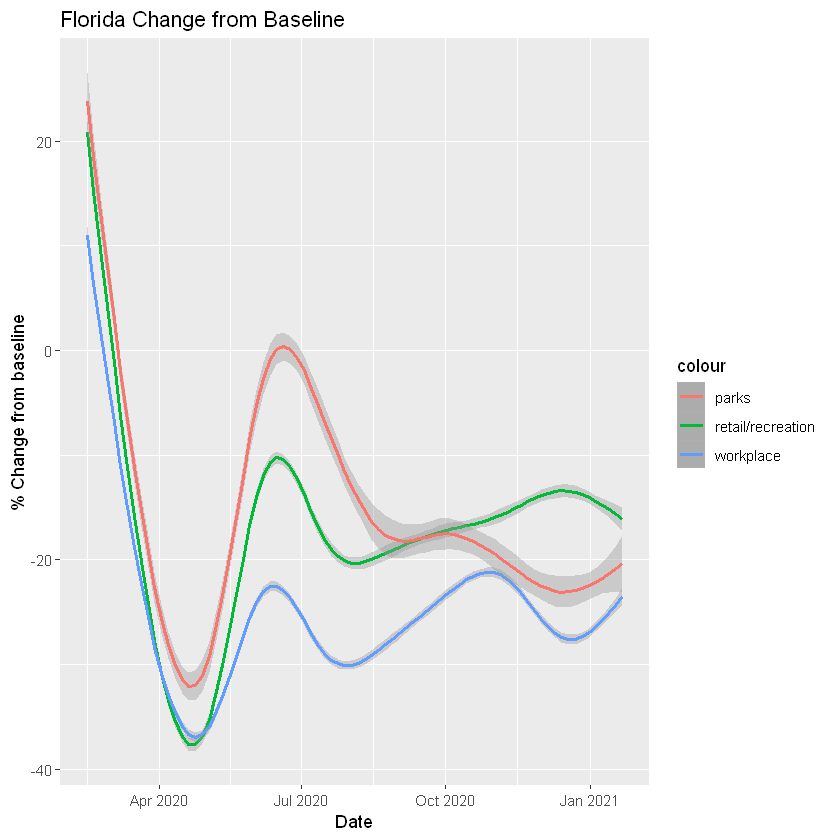

In [56]:
ggplot(mobility_FL) + 
geom_smooth(aes(x = date, y = retail_and_recreation_percent_change_from_baseline, color = "retail/recreation")) + 
geom_smooth(aes(x = date, y = workplaces_percent_change_from_baseline, color = "workplace")) +
geom_smooth(aes(x = date, y = parks_percent_change_from_baseline, color = "parks")) +
labs(title = "Florida Change from Baseline", y = "% Change from baseline", x = "Date")

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'
Warning message:
"Removed 1328 rows containing non-finite values (stat_smooth)."`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'
Warning message:
"Removed 4482 rows containing non-finite values (stat_smooth)."`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'
Warning message:
"Removed 124 rows containing non-finite values (stat_smooth)."

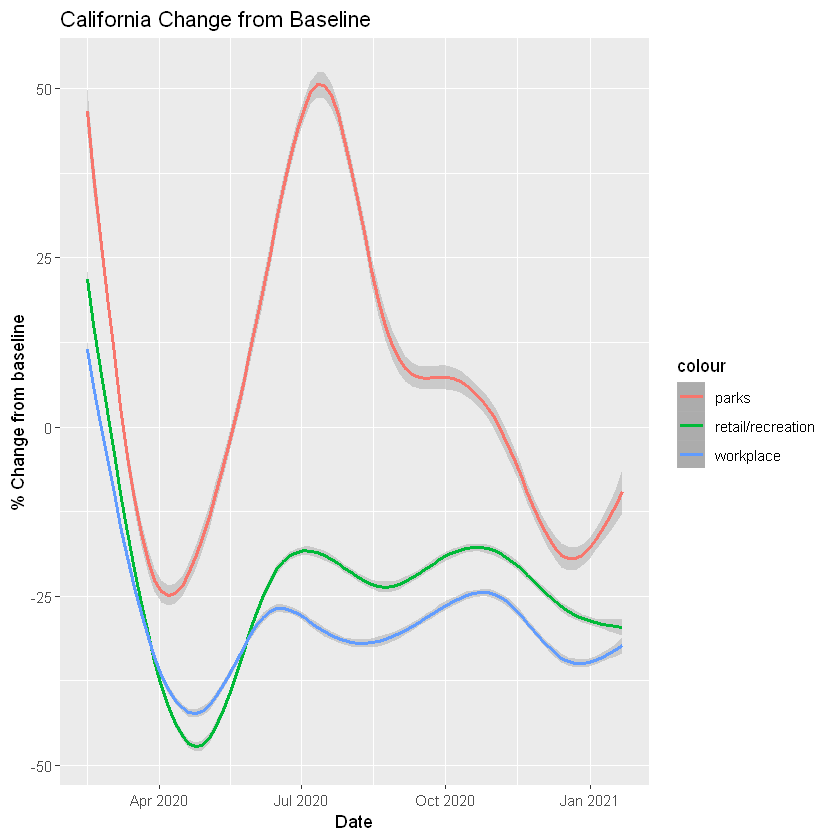

In [57]:
ggplot(mobility_CA) + 
geom_smooth(aes(x = date, y = retail_and_recreation_percent_change_from_baseline, color = "retail/recreation")) +
geom_smooth(aes(x = date, y = parks_percent_change_from_baseline, color = "parks")) +
geom_smooth(aes(x = date, y = workplaces_percent_change_from_baseline, color = "workplace")) +
labs(title = "California Change from Baseline", y = "% Change from baseline", x = "Date")